# Œ§ŒµœáŒΩŒ∑œÑŒÆ ŒùŒøŒ∑ŒºŒøœÉœçŒΩŒ∑: ŒïœÅŒ≥Œ±œÉœÑŒ∑œÅŒπŒ±Œ∫ŒÆ ŒÜœÉŒ∫Œ∑œÉŒ∑ 1

    

---



Œü œÉœÑœåœáŒøœÇ œÑŒ∑œÇ ŒµœÅŒ≥Œ±œÉŒØŒ±œÇ ŒµŒØŒΩŒ±Œπ Œ∑ ŒµœÜŒ±œÅŒºŒøŒ≥ŒÆ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºœâŒΩ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ Œ∫Œ±Œπ ŒµœçœÅŒµœÉŒ∑œÇ Œ∫Œ±ŒªœçœÑŒµœÅŒøœÖ ŒºŒøŒΩŒøœÄŒ±œÑŒπŒøœç œÉŒµ ŒªŒ±Œ≤œçœÅŒπŒΩŒ∏Œø Œ¥ŒπŒ±œÉœÑŒ¨œÉŒµœâŒΩ $N\times N$


## ŒöœéŒ¥ŒπŒ∫Œ±œÇ visualization


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

class visualization:
    def __init__(self, S, F):
        '''
          Œó ŒºŒ≠Œ∏ŒøŒ¥ŒøœÇ Œ±œÖœÑŒÆ Œ±œÅœáŒπŒ∫ŒøœÄŒøŒπŒµŒØ Œ≠ŒΩŒ± Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø œÑœçœÄŒøœÖ visualization.
          ŒïŒØœÉŒøŒ¥ŒøœÇ: 
          -> S: œÑŒø œÉŒ∑ŒºŒµŒØŒø ŒµŒ∫Œ∫ŒØŒΩœÉŒ∑œÇ œÑŒ∑œÇ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ
          -> F: œÑŒø œÉŒ∑ŒºŒµŒØŒø œÑŒµœÅŒºŒ±œÑŒπœÉŒºŒøœç
        '''
        self.S = S
        self.F = F
        self.images = []
    
    def draw_step(self, grid, frontier, expanded_nodes):
        '''
          Œó œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ Œ±œÖœÑŒÆ Œ∫Œ±ŒªŒµŒØœÑŒ±Œπ Œ≥ŒπŒ± ŒΩŒ± œÉœáŒµŒ¥ŒπŒ±œÉœÑŒµŒØ Œ≠ŒΩŒ± frame œÉœÑŒø animation (œÄœÅŒ±Œ∫œÑŒπŒ∫Œ¨ Œ≠œÄŒµŒπœÑŒ± Œ±œÄœå œÑŒ∑ŒΩ ŒµœÄŒ≠Œ∫œÑŒ±œÉŒ∑ Œ∫Œ¨Œ∏Œµ Œ∫œåŒºŒ≤ŒøœÖ)
          ŒïŒØœÉŒøŒ¥ŒøœÇ: 
          -> grid: ŒàŒΩŒ± œáŒ¨œÅœÑŒ∑œÇ œÑœçœÄŒøœÖ grid
          -> frontier: ŒúŒπŒ± ŒªŒØœÉœÑŒ± ŒºŒµ œÑŒøœÖœÇ Œ∫œåŒºŒ≤ŒøœÖœÇ œÄŒøœÖ Œ±ŒΩŒÆŒ∫ŒøœÖŒΩ œÉœÑŒø ŒºŒ≠œÑœâœÄŒø œÑŒ∑œÇ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ
          -> expanded_nodes: ŒúŒπŒ± ŒªŒØœÉœÑŒ± ŒºŒµ œÑŒøœÖœÇ Œ∫œåŒºŒ≤ŒøœÖœÇ œÄŒøœÖ Œ≠œáŒøœÖŒΩ ŒÆŒ¥Œ∑ ŒµœÄŒµŒ∫œÑŒ±Œ∏ŒµŒØ
          ŒïœÄŒπœÉœÑœÅŒ≠œÜŒµŒπ: None
          Œó œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ Œ±œÖœÑŒÆ œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± Œ∫Œ±ŒªŒµœÉœÑŒµŒØ œÑŒøœÖŒªŒ¨œáŒπœÉœÑŒøŒΩ ŒºŒπŒ± œÜŒøœÅŒ¨ Œ≥ŒπŒ± ŒΩŒ± ŒºœÄŒøœÅŒ≠œÉŒµŒπ ŒΩŒ± œÉœáŒµŒ¥ŒπŒ±œÉœÑŒµŒπ Œ≠ŒΩŒ± animation (œÄœÅŒµœÄŒµŒØ œÑŒø animation ŒΩŒ± Œ≠œáŒµŒπ œÑŒøœÖŒªŒ¨œáŒπœÉœÑŒøŒΩ Œ≠ŒΩŒ± frame).
        '''
        image = np.zeros((grid.N, grid.N, 3), dtype=int)
        image[~grid.grid] = [0, 0, 0]
        image[grid.grid] = [255, 255, 255]
        # Use this to treat 1/True as obstacles
        # image[grid.grid] = [0, 0, 0]
        # image[~grid.grid] = [255, 255, 255]
        
        for node in expanded_nodes:
            image[node] = [0, 0, 128]

        for node in frontier:
            image[node] = [0, 225, 0]

        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]
        self.images.append(image)
    
    def add_path(self, path):
        '''
          Œó œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ Œ±œÖœÑŒÆ œÄœÅŒøœÉŒ∏Œ≠œÑŒµŒπ œÉœÑŒø œÑŒµŒªŒµœÖœÑŒ±ŒØŒø frame œÑŒø Œ≤Œ≠ŒªœÑŒπœÉœÑŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ.
          ŒïŒØœÉŒøŒ¥ŒøœÇ:
          -> path: ŒúŒπŒ± ŒªŒØœÉœÑŒ± Œ∑ œåœÄŒøŒπŒ± œÄŒµœÅŒπŒ≠œáŒµŒπ œÑŒø Œ≤Œ≠ŒªœÑŒπœÉœÑŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ (Œ∑ ŒøœÄŒøŒØŒ± œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± œÄŒµœÅŒπŒ≠œáŒµŒπ Œ∫Œ±Œπ œÑŒøŒΩ Œ∫œåŒºŒ≤Œø Œ±œÅœáŒÆ Œ∫Œ±Œπ œÑŒøŒΩ Œ∫œåŒºŒ≤Œø œÉœÑœåœáŒø)
          ŒàŒæŒøŒ¥ŒøœÇ: None
        '''
        for n in path[1:-1]:
            image = np.copy(self.images[-1])
            image[n] = [66, 221, 245]
            self.images.append(image)
        for _ in range (100):
            self.images.append(image)
        
    def create_gif(self, fps = 30, repeat_delay = 2000):
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        fig = plt.figure()
        plt.axis('off')
        ims = []
        for img in self.images:
            img = plt.imshow(img)
            ims.append([img])
        ani = animation.ArtistAnimation(fig, ims, interval=1000//fps, blit=True, repeat_delay= repeat_delay)
        plt.close(fig)
        return ani
        
    def save_gif(self, filename, fps = 30):
        '''
            Œó œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ Œ±œÖœÑŒÆ ŒæŒ±ŒΩŒ±Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒµŒØ Œ∫Œ±Œπ Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçŒµŒπ œÑŒø animation œÉŒµ Œ≠ŒΩŒ± Œ±œÅœáŒµŒØŒø.
            ŒïŒØœÉŒøŒ¥ŒøœÇ:
            -> Œ§Œø œåŒΩŒøŒºŒ± œÑŒøœÖ Œ±œÅœáŒµŒØŒøœÖ ŒºŒµ Œ∫Œ±œÑŒ¨ŒªŒ∑ŒæŒ∑ .gif
            ŒàŒæŒøŒ¥ŒøœÇ: (None)
        '''
        ani = self.create_gif(fps)
        writer = PillowWriter(fps= fps)
        ani.save(filename, writer=writer)

    def show_gif(self, fps= 30, repeat_delay = 2000):
        '''
            Œó œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ Œ±œÖœÑŒÆ ŒµŒºœÜŒ±ŒΩŒØŒ∂ŒµŒπ inline œÑŒø animation.
            ŒïŒØœÉŒøŒ¥ŒøœÇ:
            -> fps: œÑŒ± frames per second
            ŒàŒæŒøŒ¥ŒøœÇ: Œ§Œø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø œÄŒøœÖ œÄŒ±ŒØŒ∂ŒµŒπ œÑŒø animation
            Exceptions: EmptyStackOfImages Œ±ŒΩ œÑŒø animation Œ¥ŒµŒΩ Œ≠œáŒµŒπ ŒøœçœÑŒµ Œ≠ŒΩŒ± frame, Œ¥Œ∑ŒªŒ±Œ¥ŒÆ Œ±ŒΩ Œ∑ draw_step Œ¥ŒµŒΩ Œ≠œáŒµŒπ Œ∫Œ±ŒªŒµœÉœÑŒµŒØ œÄŒøœÑŒ≠.
        '''
        ani = self.create_gif(fps, repeat_delay)
        # return HTML(ani.to_html5_video())
        return HTML(ani.to_jshtml())

    def show_last_frame(self):
        '''
            Œó ŒºŒ≠Œ∏ŒøŒ¥ŒøœÇ Œ±œÖœÑŒÆ ŒµŒºœÜŒ±ŒΩŒØŒ∂ŒµŒπ inline œÑŒø œÑŒµŒªŒµœÖœÑŒ±ŒØŒø frame œÄŒøœÖ Œ≠œáŒµŒπ Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒÆŒ∏ŒµŒπ.
            ŒïŒØœÉŒøŒ¥ŒøœÇ:
            ŒàŒæŒøŒ¥ŒøœÇ: Œ§Œø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø œÄŒøœÖ ŒµŒºœÜŒ±ŒΩŒØŒ∂ŒµŒπ œÑŒ∑ŒΩ ŒµŒπŒ∫œåŒΩŒ±.
            Exceptions: EmptyStackOfImages Œ±ŒΩ œÑŒø animation Œ¥ŒµŒΩ Œ≠œáŒµŒπ ŒøœçœÑŒµ Œ≠ŒΩŒ± frame, Œ¥Œ∑ŒªŒ±Œ¥ŒÆ Œ±ŒΩ Œ∑ draw_step Œ¥ŒµŒΩ Œ≠œáŒµŒπ Œ∫Œ±ŒªŒµœÉœÑŒµŒØ œÄŒøœÑŒ≠.
        '''
        if len(self.images) == 0:
            raise EmptyStackOfImages("Error! You have to call 'draw_step' at  first.")
        else:
            plt.imshow(self.images[-1])


class EmptyStackOfImages(Exception):
    pass

# ŒïŒ∫œÜœéŒΩŒ∑œÉŒ∑

## ŒúŒ≠œÅŒøœÇ 1
Œü œÉœÑœåœáŒøœÇ œÑŒøœÖ œÄœÅœéœÑŒøœÖ ŒºŒ≠œÅŒøœÖœÇ ŒµŒØŒΩŒ±Œπ Œ∑ Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒÆ **ŒªŒ±Œ≤œÖœÅŒØŒΩŒ∏œâŒΩ**. [Œ£Œµ Œ±œÖœÑœå œÑŒø Œ¨œÅŒ∏œÅŒø œÑŒ∑œÇ Wikipedia](https://en.wikipedia.org/wiki/Maze_generation_algorithm) ŒºœÄŒøœÅŒµŒØœÑŒµ ŒΩŒ± Œ≤œÅŒµŒØœÑŒµ Œ¥ŒπŒ¨œÜŒøœÅŒøœÖœÇ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖœÇ Œ≥ŒπŒ± Œ±œÖœÑœå œÑŒø œÉŒ∫ŒøœÄœå, œÉœÖŒºœÄŒµœÅŒπŒªŒ±ŒºŒ≤Œ±ŒΩŒøŒºŒ≠ŒΩŒøœÖ Œ∫Œπ Œ±œÖœÑŒøœç œÄŒøœÖ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒµŒØœÑŒ±Œπ œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ. Œ†œÅŒøœÉŒ≠ŒæœÑŒµ œåœÑŒπ ŒøŒπ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøŒπ œÑŒøœÖ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ Œ¨œÅŒ∏œÅŒøœÖ Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒ¨Œ∂ŒøœÖŒΩ Œ≠ŒΩŒ± ŒºœåŒΩŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ Œ±œÄœå Œ∫Œ¨Œ∏Œµ œÉŒ∑ŒºŒµŒØŒø œÑŒøœÖ ŒªŒ±Œ≤œÖœÅŒØŒΩŒ∏ŒøœÖ œÄœÅŒøœÇ ŒøœÄŒøŒπŒøŒ¥ŒÆœÄŒøœÑŒµ Œ¨ŒªŒªŒø (Œ∑ Œ¥ŒøŒºŒÆ œÑŒøœÖ ŒªŒ±Œ≤œÖœÅŒØŒΩŒ∏ŒøœÖ Œ≠œáŒµŒπ ŒºŒøœÅœÜŒÆ œÉœÖŒΩŒµŒ∫œÑŒπŒ∫Œøœç Œ¥Œ≠ŒΩœÑœÅŒøœÖ). ŒöŒ±ŒªŒµŒØœÉœÑŒµ ŒΩŒ± œÉœÖŒºœÄŒªŒ∑œÅœéœÉŒµœÑŒµ œÑŒøŒΩ Œ∫œéŒ¥ŒπŒ∫Œ± œÉœÑŒ± œÉŒ∑ŒºŒµŒØŒ± œÄŒøœÖ ŒªŒµŒØœÄŒµŒπ œéœÉœÑŒµ ŒøŒπ ŒªŒ±Œ≤œçœÅŒπŒΩŒ∏ŒøŒπ œÄŒøœÖ Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒ¨Œ∂ŒµŒπ œÑœÖœáŒ±ŒØŒ± ŒΩŒ± Œ≠œáŒøœÖŒΩ ŒºŒµœÑŒ±Œ≤ŒªŒ∑œÑŒÆ œÄœÖŒ∫ŒΩœåœÑŒ∑œÑŒ± ŒµŒºœÄŒøŒ¥ŒØœâŒΩ/œÑŒøŒØœáœâŒΩ (Œ∫Œ±Œ∏ŒøœÅŒØŒ∂ŒµœÑŒ±Œπ Œ±œÄœå œÑŒ∑ŒΩ œÄŒ±œÅŒ¨ŒºŒµœÑœÅŒø threshold). ŒåŒªŒøŒπ ŒøŒπ œáŒ¨œÅœÑŒµœÇ Œ∏Œ± œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± Œ≠œáŒøœÖŒΩ œÑŒøœÖŒªŒ¨œáŒπœÉœÑŒøŒΩ Œ≠ŒΩŒ± ŒºŒøŒΩŒøœÄŒ¨œÑŒπ ŒºŒµœÑŒ±Œæœç ŒµŒΩœåœÇ œÉŒ∑ŒºŒµŒØŒøœÖ Œ±œÜŒµœÑŒ∑œÅŒØŒ±œÇ (S) Œ∫Œ±Œπ ŒµŒΩœåœÇ œÉŒ∑ŒºŒµŒØŒøœÖ œÑŒµœÅŒºŒ±œÑŒπœÉŒºŒøœç (F). 

Œ£Œµ œåŒªŒ± œÑŒ± ŒµœÅœâœÑŒÆŒºŒ±œÑŒ± œÜœÅŒøŒΩœÑŒØœÉœÑŒµ ŒΩŒ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒÆœÉŒµœÑŒµ **Œ¥ŒøŒºŒ∑ŒºŒ≠ŒΩŒø** Œ∫œéŒ¥ŒπŒ∫Œ±, ŒºŒµ **œÉœáœåŒªŒπŒ±** œÄŒøœÖ ŒµœÄŒπœÉŒ∑ŒºŒ±ŒØŒΩŒøœÖŒΩ œÑŒ∑ ŒªŒøŒ≥ŒπŒ∫ŒÆ œÑŒøœÖ.


### Œ†Œ±œÅŒ±Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒ± ŒªŒ±Œ≤œÖœÅŒØŒΩŒ∏œâŒΩ
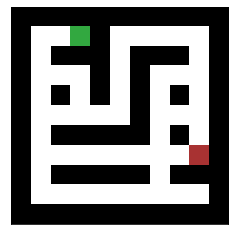
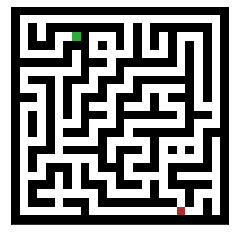
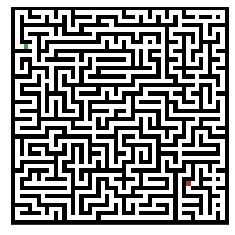

## ŒúŒ≠œÅŒøœÇ 1

In [ ]:
%matplotlib inline
import numpy as np
from queue import LifoQueue
import  random 
import matplotlib.pyplot as plt


class Maze:
    def __init__(self, N, S, F, threshold=0):

        """
        N: integer that indicates the size of the NxN grid of the maze
        S: pair of integers that indicates the coordinates of the starting point (S)
        F: pair of integers that indicates the coordinates of the finish point (F)
        You can add any other parameters you want to customize maze creation (e.g. variables that
        control the creation of additional paths)
        """
        
        assert N > 2
        # Make sure start and end are within the grid
        assert S[0] < N - 1
        assert S[1] < N - 1
        assert F[0] < N - 1
        assert F[1] < N - 1

        assert S[0] > 0
        assert S[1] > 0
        assert F[0] > 0
        assert F[1] > 0

        self.N = N
        self.S = S
        self.F = F

        # Keep track of the agents in the Maze
        self.agents=[]

        ## Initialize grid 
        self.grid = np.zeros((N, N), dtype=bool)
        
        walls = []
        def append_walls(x,y,walls_list):
            
            if x - 1 > 1 and not self.grid[x-1,y]:
                if (x-1,y,"down") in walls_list:
                    walls_list.remove((x-1,y,"down"))
                else:
                    walls.append((x-1,y,"up"))

                
            if x + 1 < self.N-2 and not self.grid[x+1,y]:
                if (x+1,y,"up") in walls_list:
                    walls_list.remove((x+1,y,"up"))
                else:
                    walls.append((x+1,y,"down"))
                
            if y - 1 > 1 and not self.grid[x,y-1]:
                if (x,y-1,"right") in walls_list:
                    walls_list.remove((x,y-1,"right"))
                else:
                    walls.append((x,y-1,"left"))
                
            if y + 1 < self.N-2 and not self.grid[x,y+1]:
                if (x,y+1,"left") in walls_list:
                    walls_list.remove((x,y+1,"left"))
                else:
                    walls.append((x,y+1,"right"))
        

                
        #start from S
        self.grid[S[0],S[1]] = 1
        append_walls(S[0],S[1],walls)
        
        while len(walls) != 0:
            #print(walls,"\n")
            temp_wall_ind = random.randint(0,len(walls)-1)
            temp_wall = walls[temp_wall_ind]
            walls.pop(temp_wall_ind)
            
            if temp_wall[2] == "left":
                #check if +2 is not already cell
                if self.grid[temp_wall[0],temp_wall[1]-1]:
                    continue
                else:
                    self.grid[temp_wall[0],temp_wall[1]] = 1
                    self.grid[temp_wall[0],temp_wall[1]-1] = 1
                    append_walls(temp_wall[0],temp_wall[1]-1,walls)
                    
            if temp_wall[2] == "right":
                #check if +2 is not already cell
                if self.grid[temp_wall[0],temp_wall[1]+1]:
                    continue
                else:
                    self.grid[temp_wall[0],temp_wall[1]] = 1
                    self.grid[temp_wall[0],temp_wall[1]+1] = 1
                    append_walls(temp_wall[0],temp_wall[1]+1,walls)
            
            if temp_wall[2] == "up":
                #check if +2 is not already cell
                if self.grid[temp_wall[0]-1,temp_wall[1]]:
                    continue
                else:
                    self.grid[temp_wall[0],temp_wall[1]] = 1
                    self.grid[temp_wall[0]-1,temp_wall[1]] = 1
                    append_walls(temp_wall[0]-1,temp_wall[1],walls)
            
            if temp_wall[2] == "down":
                #check if +2 is not already cell
                if self.grid[temp_wall[0]+1,temp_wall[1]]:
                    continue
                else:
                    self.grid[temp_wall[0],temp_wall[1]] = 1
                    self.grid[temp_wall[0]+1,temp_wall[1]] = 1
                    append_walls(temp_wall[0]+1,temp_wall[1],walls)
            
        #Now connect with F
        self.grid[F[0],F[1]] = 1
        
        if threshold > 0:
            while np.count_nonzero(self.grid == True) / ((self.N**2)-4*self.N+4) < threshold:
                self.grid[random.randint(1,N-2),random.randint(1,N-2)] = True
    
    def adjust(self,F):
        x,y = F
        def nn(Z):
            a, b = Z
            return int(self.grid[a,b+1]) + int(self.grid[a,b-1]) + int(self.grid[a-1,b]) + int(self.grid[a+1,b])
        
        if  nn(F) == 0:
   
            if x == 1 and y == 1:
                if nn((x,y)) > nn((x,y)):
                    self.grid[x,y] = True
                else:
                    self.grid[x,y] = True
                    
            elif x == 1 and y == self.N-2:
                if nn((x+1,y)) > nn((x,y-1)):
                    self.grid[x,y-1] = True
                else:
                    self.grid[x+1,y] = True
                    
            elif x == self.N-2 and y == 1:
                if nn((x-1,y)) > nn((x,y+1)):
                    self.grid[x,y+1] = True
                else:
                    self.grid[x-1,y] = True
                    
            elif x == self.N-2 and y == self.N-2:
                if nn((x-1,y)) > nn((x,y-1)):
                    self.grid[x,y-1] = True
                else:
                    self.grid[x-1,y] = True
                    
            elif x > 1 and x < self.N-2:
                if nn((x-1,y)) > nn((x+1,y)):
                    self.grid[x+1,y] = True
                else:
                    self.grid[x-1,y] = True
            
            else:
            #elif y > 1 and y < self.N-2:
                if nn((x,y-1)) > nn((x,y+1)):
                    self.grid[x,y+1] = True
                else:
                    self.grid[x,y-1] = True
        else:
            pass
        
    def print_F(self):
        print(self.grid[self.F])
    def get_S(self):
        return self.S
    def get_F(self):
        return self.F
    def draw_map(self, path=None,return_image=False,front_cells=None):

        image = np.zeros((self.N, self.N, 3), dtype=int)
        image[~self.grid] = [0, 0, 0]
        image[self.grid] = [255, 255, 255]
        # Use this to treat 1/True as obstacles
        # image[self.grid] = [0, 0, 0]
        # image[~self.grid] = [255, 255, 255]
        self.adjust(F)
        image[self.S] = [50, 168, 64]
        image[self.F] = [168, 50, 50]
        
        if front_cells:
            for n in front_cells:
                image[n[0], n[1]] = [132,112,255]
        if path:
            for n in path[1:-1]:
                image[n] = [66, 221, 245]

        if len(self.agents)>0:
          for a in self.agents:
            image[a.location]=a.color

        if return_image:
          return image
        else:
          plt.imshow(image)
          plt.xticks([])
          plt.yticks([])
          plt.show()    

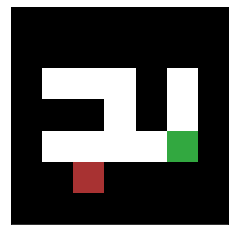

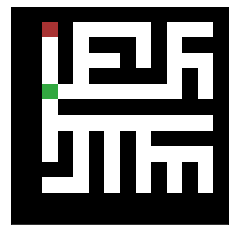

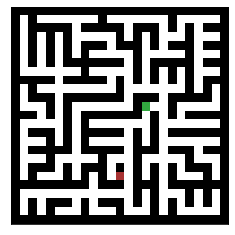

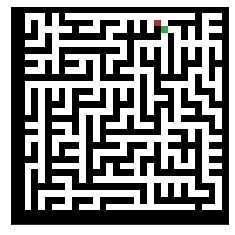

In [ ]:
for i in [7,14,25,32]:    
    N, S, F = i, (random.randint(1, i-2), random.randint(1, i-2)),(random.randint(1, i-2), random.randint(1, i-2))
    map = Maze(N, S, F)
    map.draw_map()

**Œ£œÑŒ∑ œÉœÖŒΩŒ≠œáŒµŒπŒ± œÄŒ±œÅŒøœÖœÉŒπŒ¨Œ∂ŒøœÖŒºŒµ ŒºŒµœÅŒπŒ∫ŒøœçœÇ ŒªŒ±Œ≤œÖœÅŒØŒΩŒ∏ŒøœÖœÇ ŒºŒµ Œ±œÖŒæŒ±ŒΩœåŒºŒµŒΩŒø Œ±œÅŒπŒ∏Œºœå Threshold, Œ∫Œ¨œÑŒπ œÄŒøœÖ œÑŒøœÖœÇ Œ∫Œ¨ŒΩŒµŒπ œÄŒπŒø œÄœÖŒ∫ŒΩŒøœçœÇ, Œ¥Œ∑ŒªŒ±Œ¥ŒÆ ŒΩŒ± Œ≠œáŒøœÖŒΩ ŒªŒπŒ≥œåœÑŒµœÅŒ± ŒµŒºœÄœåŒ¥ŒπŒ±.**

0.0


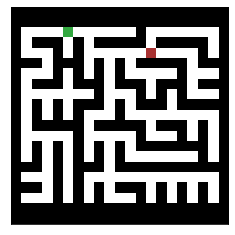

0.1111111111111111


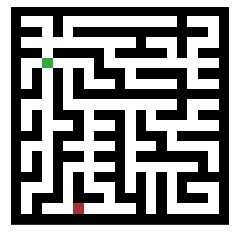

0.2222222222222222


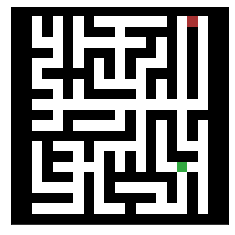

0.3333333333333333


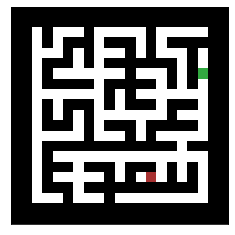

0.4444444444444444


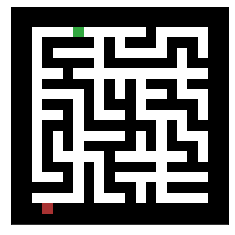

0.5555555555555556


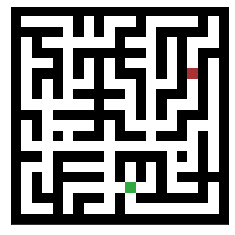

0.6666666666666666


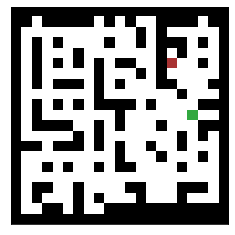

0.7777777777777777


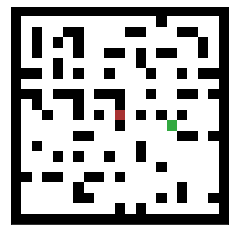

0.8888888888888888


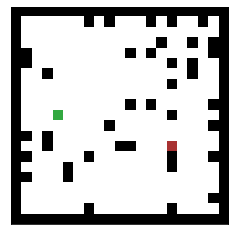

1.0


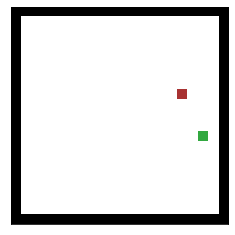

In [ ]:
for thres in np.linspace(0,1,10):
    print(thres)
    N, S, F = 21, (random.randint(1, 19), random.randint(1, 19)),(random.randint(1, 19), random.randint(1, 19))
    map = Maze(N=N, S=S, F=F, threshold=thres)
    map.draw_map()

## ŒúŒ≠œÅŒøœÇ 2

Œ£œÑŒø Œ¥ŒµœçœÑŒµœÅŒø ŒºŒ≠œÅŒøœÇ œÑŒ∑œÇ ŒµœÅŒ≥Œ±œÉŒØŒ±œÇ Œ∫Œ±ŒªŒµŒØœÉœÑŒµ ŒΩŒ± œÖŒªŒøœÄŒøŒπŒÆœÉŒµœÑŒµ Œ¥ŒπŒ¨œÜŒøœÅŒøœÖœÇ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖœÇ ŒµœçœÅŒµœÉŒ∑œÇ œÉœÖŒΩœÑŒøŒºœåœÑŒµœÅœâŒΩ ŒºŒøŒΩŒøœÄŒ±œÑŒπœéŒΩ ŒºŒµœÑŒ±Œæœç Œ¥œÖŒø Œ∫œåŒºŒ≤œâŒΩ Œ≥ŒπŒ± œÑŒøœÖœÇ ŒªŒ±Œ≤œÖœÅŒØŒΩŒ∏ŒøœÖœÇ œÄŒøœÖ œÄŒ±œÅŒ¨Œ≥ŒøŒΩœÑŒ±Œπ Œ±œÄœå œÑŒøŒΩ Œ∫œéŒ¥ŒπŒ∫Œ± œÑŒøœÖ œÄœÅœéœÑŒøœÖ ŒºŒ≠œÅŒøœÖœÇ. Œ†Œ±œÅŒ¨ŒªŒªŒ∑ŒªŒ± Œ∫Œ±ŒªŒµŒØœÉœÑŒµ ŒΩŒ± Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒ¨œÉŒµœÑŒµ Œ∫Œ±Œπ Œ¥ŒπŒ¨œÜŒøœÅŒµœÇ œÉœÖŒΩŒ±œÅœÑŒÆœÉŒµŒπœÇ Œ∫œåœÉœÑŒøœÖœÇ œÑœåœÉŒø Œ≥ŒπŒ± œÑŒ∑ŒΩ ŒºŒ≠œÑœÅŒ∑œÉŒ∑ œÑœâŒΩ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫œéŒΩ Œ±œÄŒøœÉœÑŒ¨œÉŒµœâŒΩ œåœÉŒø Œ∫Œ±Œπ Œ≥ŒπŒ± œÑŒ∑ŒΩ ŒµŒ∫œÑŒØŒºŒ∑œÉŒ∑ œÑœâŒΩ Œ±œÄŒøœÉœÑŒ¨œÉŒµœâŒΩ Œ±œÄœå Œ≠ŒΩŒ±ŒΩ Œ∫œåŒºŒ≤Œø œÉœÑŒøŒΩ Œ∫œåŒºŒ≤Œø œÉœÑœåœáŒø (heuristic). ŒïœÄŒØœÉŒ∑œÇ ŒºœÄŒøœÅŒµŒØœÑŒµ ŒΩŒ± œÄŒµŒπœÅŒ±ŒºŒ±œÑŒπœÉœÑŒµŒØœÑŒµ ŒºŒµ ŒøœÄŒøŒπŒ±Œ¥ŒÆœÄŒøœÑŒµ Œ±œÄœå œÑŒπœÇ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅŒøœÖœÇ Œ∫Œ¨Œ∏Œµ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖ ŒºŒµ œÉŒ∫ŒøœÄœå ŒΩŒ± ŒºŒµŒªŒµœÑŒÆœÉŒµœÑŒµ œÑŒø œÄœéœÇ ŒøŒπ Œ±ŒªŒªŒ±Œ≥Œ≠œÇ Œ±œÖœÑŒ≠œÇ ŒµœÄŒ∑œÅŒµŒ¨Œ∂ŒøœÖŒΩ œÑŒ∑ŒΩ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ±, œÑŒøŒΩ œáœÅœåŒΩŒø Œ∫Œ±Œ∏œéœÇ Œ∫Œ±Œπ Œ≤Œ≠ŒªœÑŒπœÉœÑŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ. ŒüŒπ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøŒπ Œ∫Œ±Œ∏œéœÇ Œ∫Œ±Œπ ŒøŒπ œÄŒ±œÅŒ±ŒªŒªŒ±Œ≥Œ≠œÇ œÑŒøœÖœÇ Œ∏Œ± œÑœÅŒ≠ŒæŒøœÖŒΩ œÉŒµ ŒªŒ±Œ≤œÖœÅŒØŒΩŒ∏ŒøœÖœÇ ŒºŒµ Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫Œ¨ ŒºŒµŒ≥Œ≠Œ∏Œ∑. Œ•ŒªŒøœÄŒøŒπŒÆœÉœÑŒµ œÑŒøœÖœÇ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖœÇ œÉœÑŒø Œ∫ŒµŒªŒØ Œ∫œéŒ¥ŒπŒ∫Œ± œÑŒøœÖ ŒúŒ≠œÅŒøœÖœÇ 2.<br>

Œó Œ≥ŒµŒΩŒπŒ∫ŒÆ ŒºŒøœÅœÜŒÆ œÑŒ∑œÇ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑œÇ Œ∫œåœÉœÑŒøœÖœÇ œÉœÑŒøŒΩ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø Œë* ŒµŒØŒΩŒ±Œπ:
$$f(n)=g(n)+h(n)$$
Œ†Œ±œÅŒ±œÄŒ¨ŒΩœâ, Œ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ $g(n)$ Œ¥ŒØŒΩŒµŒπ œÑŒ∑ŒΩ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫ŒÆ Œ±œÄœåœÉœÑŒ±œÉŒ∑ Œ±œÄœå œÑŒø œÉŒ∑ŒºŒµŒØŒø ŒµŒ∫Œ∫ŒØŒΩŒ∑œÉŒ∑œÇ ŒºŒ≠œáœÅŒπ œÑŒøŒΩ Œ∫œåŒºŒ≤Œø $n$, Œ∫Œ±Œπ Œ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ $h(n)$ Œ±œÄŒøœÑŒµŒªŒµŒØ ŒºŒπŒ± ŒµœÖœÅŒπœÉœÑŒπŒ∫ŒÆ œÑŒ∑œÇ Œ±œÄœåœÉœÑŒ±œÉŒ∑œÇ Œ±œÄœå œÑŒøŒΩ Œ∫œåŒºŒ≤Œø $n$ ŒºŒ≠œáœÅŒπ œÑŒøŒΩ œÉœÑœåœáŒø. Œ£Œ±œÇ Œ∂Œ∑œÑŒµŒØœÑŒ±Œπ ŒΩŒ± œÄŒµŒπœÅŒ±ŒºŒ±œÑŒπœÉœÑŒµŒØœÑŒµ ŒºŒµ œÑŒπœÇ ŒµŒæŒÆœÇ ŒµœÄŒπŒªŒøŒ≥Œ≠œÇ Œ≥ŒπŒ± œÑŒπœÇ Œ¥œçŒø œÉœÖŒΩŒ±œÅœÑŒÆœÉŒµŒπœÇ:
* $g(n)=0$ Œ∫Œ±Œπ $h(n)=\{\text{manhattan}(n),\text{euclidean}(n)\}$. Œ†ŒøŒπŒøœÇ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ œÄœÅŒøŒ∫œçœÄœÑŒµŒπ; ŒúœÄŒøœÅŒµŒØ ŒΩŒ± Œ≤œÅŒµŒπ œÄŒ¨ŒΩœÑŒ± œÑŒø Œ≤Œ≠ŒªœÑŒπœÉœÑŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ;
* $g(n)=1$ Œ∫Œ±Œπ $h(n)=0$. Œ†ŒøŒπŒøœÇ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ œÄœÅŒøŒ∫œçœÄœÑŒµŒπ; ŒúœÄŒøœÅŒµŒØ ŒΩŒ± Œ≤œÅŒµŒπ œÄŒ¨ŒΩœÑŒ± œÑŒø Œ≤Œ≠ŒªœÑŒπœÉœÑŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ;
* $g(n)=1$ Œ∫Œ±Œπ $h(n)=\{\text{manhattan}(n),\text{euclidean}(n)\}$. Œ†ŒøŒπŒøœÇ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ œÄœÅŒøŒ∫œçœÄœÑŒµŒπ; ŒúœÄŒøœÅŒµŒØ ŒΩŒ± Œ≤œÅŒµŒπ œÄŒ¨ŒΩœÑŒ± œÑŒø Œ≤Œ≠ŒªœÑŒπœÉœÑŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ;

ŒúœÄŒøœÅŒµŒØœÑŒµ ŒΩŒ± œÄœÅŒøœÑŒµŒØŒΩŒµœÑŒµ Œ∫Œ±Œπ Œ¨ŒªŒªŒµœÇ ŒµœÖœÅŒπœÉœÑŒπŒ∫Œ≠œÇ œÉœÖŒΩŒ±œÅœÑŒÆœÉŒµŒπœÇ ŒµŒ∫œÑœåœÇ Œ±œÄœå œÑŒπœÇ Œ±œÄŒøœÉœÑŒ¨œÉŒµŒπœÇ manhattan Œ∫Œ±Œπ euclidean;

## ŒúŒ≠œÅŒøœÇ 2


In [ ]:
#Experimental
from scipy.spatial.distance import minkowski
class pathfinder:
    def __init__(self, maze, c, h):
        self.S = maze.get_S()
        self.F = maze.get_F()
        self.cost = c
        self.heuristic = h
        self.maze = maze
        self.path = []
        self.seen = set()
        self.vis = visualization(self.S, self.F)

    def get_neighbors(self, Z):
        neighbors = set()
        x, y = Z
        if x - 1 >= 0 and self.maze.grid[x - 1,y]:
            neighbors.add((x-1,y))
        if x + 1 < self.maze.N and self.maze.grid[x + 1,y]:
            neighbors.add((x+1,y))
        if y - 1 >= 0 and self.maze.grid[x,y - 1]:
            neighbors.add((x,y-1))
        if y + 1 < self.maze.N and self.maze.grid[x,y + 1]:
            neighbors.add((x,y+1))
        return neighbors
    
    def f(self, current, Z):
        if self.cost == 0:
            if self.heuristic == 0:
                return self.cost
            else:
                return minkowski(Z, self.F, p=self.heuristic)
        elif self.cost == 1:
            if self.heuristic == 0:
                return self.cost
            else:
                return minkowski(Z, self.F, p=self.heuristic)
            
    def find_path(self):
        frontier = {self.S:0}     
        came_from = {}
        came_from[self.S] = None
        cost_so_far = {}
        cost_so_far[self.S] = 0
        self.expanded = set()
        self.no_expanded_nodes = 0
        self.seen.add(self.S)
        
        while frontier != {}:
            sorted_frontier = sorted(frontier.items(), key=operator.itemgetter(1))
            current = sorted_frontier[0][0]
            self.no_expanded_nodes += 1
            del frontier[current]

            if current == self.F:
                break
                
            self.expanded.add(current)           
            neighbors = self.get_neighbors(current)
            for neighbor in neighbors:
                
                temp_cost = self.f(current, neighbor)
                
                if neighbor in self.expanded and temp_cost >= cost_so_far[neighbor]:
                    continue
                    
                cost_so_far[neighbor] = temp_cost
                
                if neighbor in frontier:
                    if temp_cost <= frontier[neighbor]:
                        frontier[neighbor] = temp_cost
                        came_from[neighbor] = current
                        cost_so_far[neighbor] = temp_cost
                else:
                    frontier[neighbor] = temp_cost
                    came_from[neighbor] = current
                    cost_so_far[neighbor] = temp_cost

        # follow backlinks to build path
        current = self.F
        path = []
        while current != self.S:
            path.append(current)
            if current not in came_from:
                self.maze.draw_map()
            current = came_from[current]
        path.append(self.S)
        path.reverse()
        self.path = path
        
    def get_path(self):
        return self.path
    def get_expanded(self):
        return self.expanded
    def get_complexity(self):
        return self.no_expanded_nodes

- **ŒòŒ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒÆœÉŒøœÖŒºŒµ œÑŒ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ minkowski, Œ∑ ŒøœÄŒøŒØŒ± Œ±œÄŒøœÑŒµŒªŒµŒØ œÑŒ∑ Œ≥ŒµŒΩŒπŒ∫ŒÆ ŒºŒøœÅœÜŒÆ œÑŒ∑œÇ Œ±œÄœåœÉœÑŒ±œÉŒ∑œÇ manhattan (p=1) Œ∫Œ±Œπ œÑŒ∑œÇ euclidean (p=2). Œ†Œ≠œÅŒ± Œ±œÄœå œÑŒøœÖœÇ œÄœÅŒøŒ±ŒΩŒ±œÜŒµœÅŒ∏Œ≠ŒΩœÑŒµœÇ œÉœÖŒΩŒ¥œÖŒ±œÉŒºŒøœçœÇ Œ∏Œ± Œ¥ŒøŒ∫ŒπŒºŒ¨œÉŒøœÖŒºŒµ ŒªŒøŒπœÄœåŒΩ Œ∫Œ±Œπ œÑŒπŒºŒ≠œÇ p=3 Œ≥ŒπŒ± g(n)=0 Œ∫Œ±Œπ g(n)=1.**

- **ŒîŒøŒ∫ŒπŒºŒ¨Œ∂ŒøœÖŒºŒµ œÑŒøŒΩ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø Œë* œÉŒµ ŒªŒ±Œ≤œÖœÅŒØŒΩŒ∏ŒøœÖœÇ 2 ŒºŒµŒ≥ŒµŒ∏œéŒΩ Œ≥ŒπŒ± Œù=21 Œ∫Œ±Œπ Œù=41.**

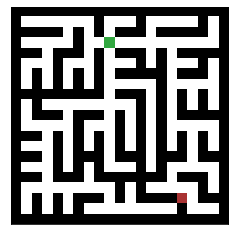

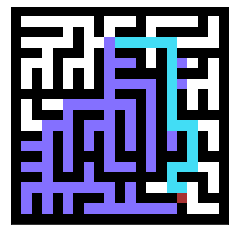

Number of expanded nodes: 119
Wall time: 76 ms


In [ ]:
%%time
import operator
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 0, h = 1)
pf.find_path()
maze.draw_map(path=pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

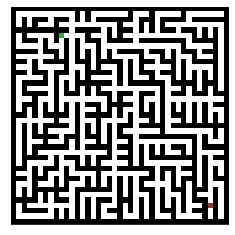

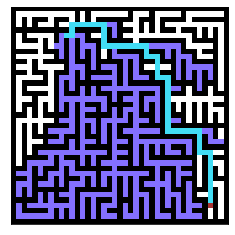

Number of expanded nodes: 532
Wall time: 96 ms


In [ ]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 0, h = 1)
pf.find_path()
maze.draw_map(path=pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

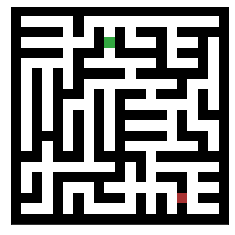

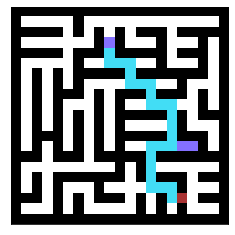

Number of expanded nodes: 29
Wall time: 75 ms


In [ ]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 0, h = 2)
pf.find_path()
maze.draw_map(path=pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

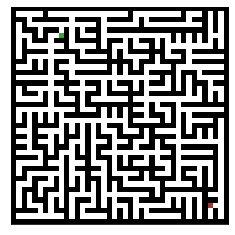

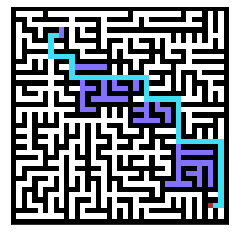

Number of expanded nodes: 152
Wall time: 78 ms


In [ ]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 0, h = 2)
pf.find_path()
maze.draw_map(path=pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

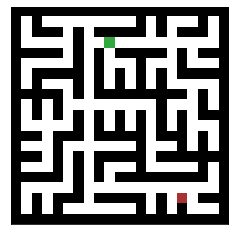

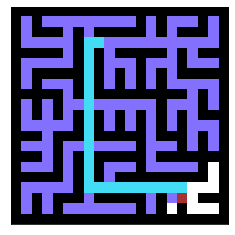

Number of expanded nodes: 190
Wall time: 115 ms


In [ ]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 0)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

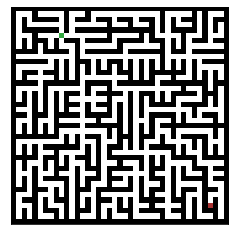

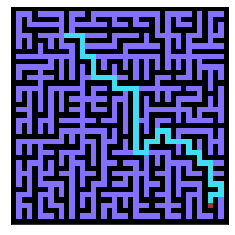

Number of expanded nodes: 799
Wall time: 78 ms


In [ ]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 0)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

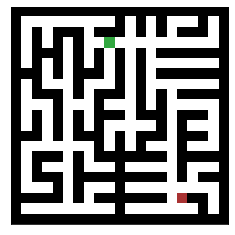

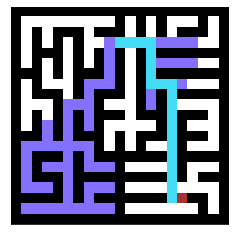

Number of expanded nodes: 88
Wall time: 78 ms


In [ ]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 1)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

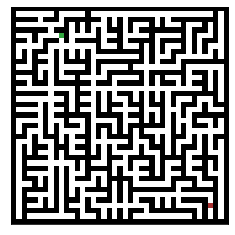

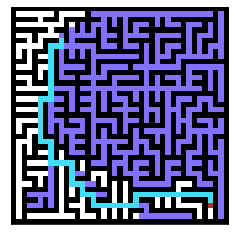

Number of expanded nodes: 615
Wall time: 92 ms


In [ ]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 1)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

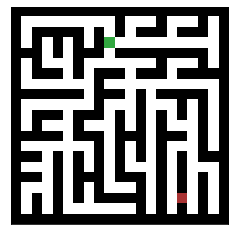

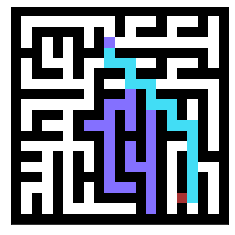

Number of expanded nodes: 57
Wall time: 80 ms


In [ ]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 2)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

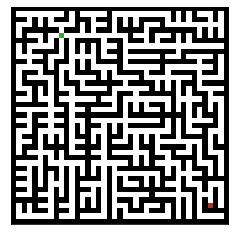

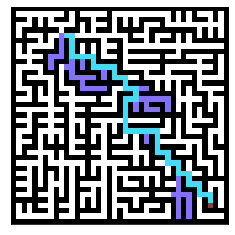

Number of expanded nodes: 125
Wall time: 78 ms


In [ ]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 2)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

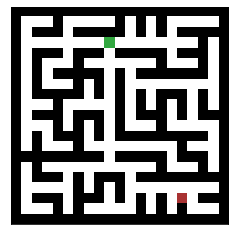

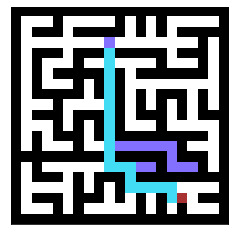

Number of expanded nodes: 35
Wall time: 80 ms


In [ ]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 0, h = 3)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

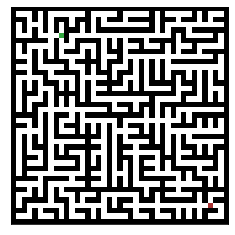

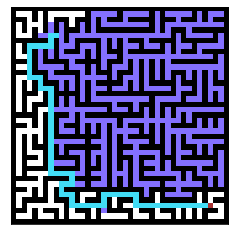

Number of expanded nodes: 630
Wall time: 145 ms


In [ ]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 0, h = 3)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

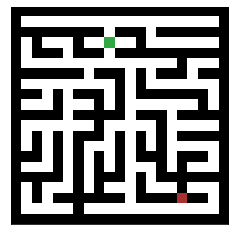

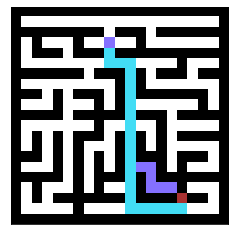

Number of expanded nodes: 31
Wall time: 73 ms


In [ ]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
N = 21
S = (3, 9)
F = (18, 16)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 3)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

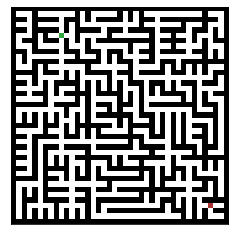

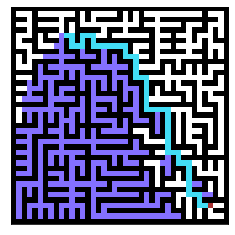

Number of expanded nodes: 465
Wall time: 95 ms


In [ ]:
%%time
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
## Create a 41x41 maze
N = 41
S = (5, 9)
F = (37, 37)
maze = Maze(N, S, F)
maze.draw_map()
pf = pathfinder(maze=maze, c = 1, h = 3)
pf.find_path()
maze.draw_map(pf.get_path(),return_image=False,front_cells=pf.get_expanded())
expanded_nodes = pf.get_complexity()
print('Number of expanded nodes:', expanded_nodes)

## ŒúŒ≠œÅŒøœÇ 3

Œ£œÑŒø œÑœÅŒØœÑŒø ŒºŒ≠œÅŒøœÇ Œ∫Œ±ŒªŒµŒØœÉœÑŒµ ŒΩŒ± œÖŒªŒøœÄŒøŒπŒÆœÉŒµœÑŒµ ŒºŒπŒ± œÉœÖŒ≥Œ∫œÅŒπœÑŒπŒ∫ŒÆ ŒºŒµŒªŒ≠œÑŒ∑ œÑœâŒΩ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºœâŒΩ œÄŒøœÖ Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒ¨œÉŒ±œÑŒµ œÉœÑŒø ŒúŒ≠œÅŒøœÇ 2 ŒºŒµ œÉŒ∫ŒøœÄœå ŒΩŒ± Œ∫Œ±œÑŒ±ŒªŒÆŒæŒµœÑŒµ œÉŒµ ŒøœÅŒπœÉŒºŒ≠ŒΩŒ± œÉœÖŒºœÄŒµœÅŒ¨œÉŒºŒ±œÑŒ±. ŒüŒπ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøŒπ Œ∏Œ± œÉœÖŒ≥Œ∫œÅŒØŒΩŒøŒΩœÑŒ±Œπ ŒºŒµ Œ≤Œ¨œÉŒ∑ œÑŒ∑ŒΩ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ¨ œÑŒøœÖœÇ Œ∫Œ±Œπ œÑŒø Œ∫Œ±œÑŒ¨ œÄœåœÉŒø ŒºœÄŒøœÅŒøœçŒΩ ŒΩŒ± Œ≤œÅŒøœçŒΩ œÑŒø Œ≤Œ≠ŒªœÑŒπœÉœÑŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ. 
 
ŒìŒπŒ± ŒΩŒ± Œ∫œÅŒØŒΩŒøœÖŒºŒµ œÑŒøŒΩ œÑœÅœåœÄŒø ŒºŒµ œÑŒøŒΩ ŒøœÄŒøŒØŒø œÑŒø ŒºŒ≠Œ≥ŒµŒ∏ŒøœÇ œÑŒøœÖ ŒªŒ±Œ≤œçœÅŒπŒΩŒ∏ŒøœÖ ŒµœÄŒ∑œÅŒµŒ¨Œ∂ŒµŒπ œÑŒøœÖœÇ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖœÇ, Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒ¨Œ∂ŒøœÖŒºŒµ œáŒ¨œÅœÑŒµœÇ ŒºŒµ Œ¥ŒπŒ¨œÉœÑŒ±œÉŒ∑ $N=[10,20,\ldots,100]$. ŒìŒπŒ± Œ∫Œ¨Œ∏Œµ œÄŒ±œÅŒ±ŒºŒµœÑœÅŒøœÄŒøŒØŒ∑œÉŒ∑ œÄœÅŒøœÑŒµŒØŒΩŒµœÑŒ±Œπ ŒΩŒ± Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒ¨Œ∂ŒµœÑŒµ 100 Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫ŒøœçœÇ œáŒ¨œÅœÑŒµœÇ, œÉœÑŒøœÖœÇ ŒøœÄŒøŒØŒøœÖœÇ Œ∏Œ± ŒµŒ∫œÑŒµŒªŒµŒØœÑŒµ œÑŒøœÖœÇ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖœÇ.
 
ŒàœÄŒµŒπœÑŒ±, Œ∂Œ∑œÑŒµŒØœÑŒ±Œπ ŒΩŒ± œÉœÖŒªŒªŒ≠ŒæŒµœÑŒµ œÑŒ± ŒµŒæŒÆœÇ œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫Œ¨:
 * œÑŒø ŒºŒÆŒ∫ŒøœÇ œÑŒøœÖ ŒµŒªŒ¨œáŒπœÉœÑŒøœÖ ŒºŒøŒΩŒøœÄŒ±œÑŒπŒøœç œÄŒøœÖ ŒµŒæŒ¨Œ≥ŒµŒπ Œø ŒµŒ∫Œ¨œÉœÑŒøœÑŒµ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ.
 * œÑŒø œÄŒªŒÆŒ∏ŒøœÇ œÑœâŒΩ ŒµœÄŒµŒ∫œÑŒµœÑŒ±ŒºŒ≠ŒΩœâŒΩ Œ∫œåŒºŒ≤œâŒΩ (expanded nodes) œÑŒøœÖ Œ∫Œ¨Œ∏Œµ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖ, œÄŒøœÖ Œ±œÄŒøœÑŒµŒªŒµŒØ ŒºŒ≠œÑœÅŒø œÑŒ∑œÇ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ¨œÇ œÑŒøœÖ.
 
 ŒìŒπŒ± ŒΩŒ± œÉŒ±œÇ ŒµŒØŒΩŒ±Œπ ŒµœçŒ∫ŒøŒªŒø ŒΩŒ± ŒµŒæŒ¨Œ≥ŒµœÑŒµ œÉœÖŒºœÄŒµœÅŒ¨œÉŒºŒ±œÑŒ± Œ±œÄœå œÑŒπœÇ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÄŒ±œÅŒ±ŒºŒµœÑœÅŒøœÄŒøŒπŒÆœÉŒµŒπœÇ, Œ∂Œ∑œÑŒµŒØœÑŒ±Œπ ŒΩŒ± Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒ¨œÉŒµœÑŒµ Œ¥œçŒø Œ≥œÅŒ±œÜŒπŒ∫Œ≠œÇ œÄŒ±œÅŒ±œÉœÑŒ¨œÉŒµŒπœÇ:
 * œÑŒø ŒºŒÆŒ∫ŒøœÇ œÑŒøœÖ ŒµŒªŒ¨œáŒπœÉœÑŒøœÖ ŒºŒøŒΩŒøœÄŒ±œÑŒπŒøœç œÉœÖŒΩŒ±œÅœÑŒÆœÉŒµŒπ œÑŒøœÖ ŒºŒµŒ≥Œ≠Œ∏ŒøœÖœÇ œÑŒøœÖ œáŒ¨œÅœÑŒ∑
 * œÑŒø œÄŒªŒÆŒ∏ŒøœÇ œÑœâŒΩ expanded nodes œÉœÖŒΩŒ±œÅœÑŒÆœÉŒµŒπ œÑŒøœÖ ŒºŒµŒ≥Œ≠Œ∏ŒøœÖœÇ œÑŒøœÖ œáŒ¨œÅœÑŒ∑



 Œ£Œ±œÇ Œ∂Œ∑œÑŒµŒØœÑŒ±Œπ œÉœáŒøŒªŒπŒ¨œÉŒµœÑŒµ œÑŒπœÇ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ Œ≥œÅŒ±œÜŒπŒ∫Œ≠œÇ œÄŒ±œÅŒ±œÉœÑŒ¨œÉŒµŒπœÇ, Œ∫Œ±Œπ œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒ± œÑŒø œÄœéœÇ ŒºŒµœÑŒ±Œ≤Œ¨ŒªŒªŒµœÑŒ±Œπ Œ∑ œÉœÖŒºœÄŒµœÅŒπœÜŒøœÅŒ¨ œÑœâŒΩ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºœâŒΩ œÉœÖŒΩŒ±œÅœÑŒÆœÉŒµŒπ œÑŒøœÖ $N$.
 
 Œ£Œ∑ŒºŒµŒπœéŒΩŒøœÖŒºŒµ œÑŒ± œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ:
 
 * Œ£Œµ œåŒªŒ± œÑŒ± œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÄŒµŒπœÅŒ¨ŒºŒ±œÑŒ± ŒºœÄŒøœÅŒµŒØœÑŒµ ŒΩŒ± ŒªŒ¨Œ≤ŒµœÑŒµ œÉŒ±ŒΩ œÉŒ∑ŒºŒµŒØŒø ŒµŒ∫Œ∫ŒØŒΩŒ∑œÉŒ∑œÇ œÑŒø $(1,1)$ Œ∫Œ±Œπ œÉŒ±ŒΩ œÉŒ∑ŒºŒµŒØŒø œÑŒµœÅŒºŒ±œÑŒπœÉŒºŒøœç œÑŒø $(N-2,N-2)$. ŒïŒΩŒ±ŒªŒªŒ±Œ∫œÑŒπŒ∫Œ¨, ŒºœÄŒøœÅŒµŒØœÑŒµ ŒΩŒ± œÄŒµŒπœÅŒ±ŒºŒ±œÑŒπœÉŒ∏ŒµŒØœÑŒµ ŒºŒµ œÑœÖœáŒ±ŒØŒ± œÉŒ∑ŒºŒµŒØŒ± ŒµŒ∫Œ∫ŒπŒΩŒ∑œÉŒ∑œÇ Œ∫Œ±Œπ œÑŒµœÅŒºŒ±œÑŒπœÉŒºŒøœç.
 * ŒëŒΩ Œ∫Œ±Œπ ŒøŒπ œáŒ¨œÅœÑŒµœÇ œÄŒ±œÅŒ¨Œ≥ŒøŒΩœÑŒ±Œπ œÑœÖœáŒ±ŒØŒ±, Œ∑ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºœâŒΩ œÉŒµ Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫ŒøœçœÇ œáŒ¨œÅœÑŒµœÇ œÄŒ±œÅŒ¨Œ≥ŒµŒπ ŒºŒ∑ œÉœÖŒ≥Œ∫œÅŒØœÉŒπŒºŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±.
 * ŒìŒπŒ± ŒªœåŒ≥ŒøœÖœÇ ŒµœÖŒ∫ŒøŒªŒØŒ±œÇ œÉœçŒ≥Œ∫œÅŒπœÉŒ∑œÇ, œÄœÅŒøœÑŒµŒØŒΩŒµœÑŒ±Œπ ŒΩŒ± œÑŒøœÄŒøŒ∏ŒµœÑŒÆœÉŒµœÑŒµ œÄŒøŒªŒªŒ±œÄŒªŒ≠œÇ Œ≥œÅŒ±œÜŒπŒ∫Œ≠œÇ œÄŒ±œÅŒ±œÉœÑŒ¨œÉŒµŒπœÇ œÉœÑŒø ŒØŒ¥ŒπŒø œÉœçœÉœÑŒ∑ŒºŒ± Œ±ŒæœåŒΩœâŒΩ, œåœÄŒøœÖ Œ±œÖœÑœå ŒµŒØŒΩŒ±Œπ ŒµœÜŒπŒ∫œÑœå.

**Visualization**: Œ†Œ±œÅŒ¨ŒªŒªŒ∑ŒªŒ± ŒºŒµ œÑŒ± œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÉŒ¨œÇ Œ¥ŒØŒΩŒµœÑŒ±Œπ Œ≠œÑŒøŒπŒºŒ∑ Œ∫Œ±Œπ ŒºŒπŒ± Œ∫ŒªŒ¨œÉŒ∑ Œ∑ œåœÄŒøŒπŒ± Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒ¨Œ∂ŒµŒπ Œ≠ŒΩŒ± animation œÑŒ∑œÇ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ œÑŒø ŒøœÄŒøŒØŒø œÖŒªŒøœÄŒøŒπŒµŒØ Œ∫Œ¨Œ∏Œµ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ. ŒìŒπŒ± œÑŒ∑ŒΩ œáœÅŒÆœÉŒ∑ œÑŒ∑œÇ Œ∫ŒªŒ¨œÉŒ∑œÇ Œ±œÖœÑŒÆœÇ œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± Œ∫Œ¨ŒΩŒµœÑŒµ œÑŒ± ŒµŒæŒÆœÇ 4 Œ≤ŒÆŒºŒ±œÑŒ±:

1.	ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± ŒµŒΩœåœÇ instance œÑŒ∑œÇ Œ∫ŒªŒ¨œÉŒ∑œÇ ŒµŒ∫œÑŒµŒªœéŒΩœÑŒ±œÇ œÑŒ∑ŒΩ œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ ŒµŒΩœÑŒøŒªŒÆ: `visualization(Start, Goal)`. Œó ŒµŒΩœÑŒøŒªŒÆ Œ±œÖœÑŒÆ Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒµŒØ Œ≠ŒΩŒ± Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø œÑœçœÄŒøœÖ visualization. 
2.	Œ§Œø Œ≤ŒØŒΩœÑŒµŒø œÄŒøœÖ œÄŒ±œÅŒ¨Œ≥ŒµœÑŒ±Œπ Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ ŒøœÖœÉŒπŒ±œÉœÑŒπŒ∫Œ¨ Œ±œÄŒøœÑŒµŒªŒµŒØœÑŒ±Œπ Œ±œÄœå stacked frames. Œ£œÖŒΩŒµœÄœéœÇ œÉŒµ Œ∫Œ¨Œ∏Œµ Œ≤ŒÆŒºŒ± ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑œÇ œåœÄŒøœÖ Œ¥Œ∑ŒªŒ±Œ¥ŒÆ Œ∏Œ≠ŒªŒøœÖŒºŒµ ŒΩŒ± œÄœÅŒøœÉŒ∏Œ≠œÉŒøœÖŒºŒµ Œ≠ŒΩŒ± frame œÉœÑŒø Œ≤ŒØŒΩœÑŒµŒø œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± Œ∫Œ±ŒªŒ≠œÉŒøœÖŒºŒµ œÑŒ∑ŒΩ ŒºŒ≠Œ∏ŒøŒ¥Œø œÑŒ∑œÇ Œ∫ŒªŒ¨œÉŒ∑œÇ: `draw_step(grid, frontier, expanded_nodes)` œåœÄŒøœÖ œÑŒø œÄœÅœéœÑŒø œåœÅŒπœÉŒºŒ± ŒµŒØŒΩŒ±Œπ Œ≠ŒΩŒ±œÇ œáŒ¨œÅœÑŒ∑œÇ (œÑœçœÄŒøœÖ Maze) œÑŒø Œ¥ŒµœçœÑŒµœÅŒø ŒºŒπŒ± ŒªŒØœÉœÑŒ± ŒºŒµ œÑŒø ŒºŒ≠œÑœâœÄŒø œÑŒ∑œÇ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑ ŒµŒΩœé œÑŒø œÑœÅŒØœÑŒø ŒºŒπŒ± ŒªŒØœÉœÑŒ± ŒºŒµ œÑŒøœÖœÇ Œ∫œåŒºŒ≤ŒøœÖœÇ ŒøŒπ œåœÄŒøŒπŒøŒπ Œ≠œáŒøœÖŒΩ ŒÆŒ¥Œ∑ ŒµœÄŒµŒ∫œÑŒ±Œ∏ŒµŒØ Œ±œÄœå œÑŒøŒΩ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø. 
3.	(Œ†œÅŒøŒ±ŒπœÅŒµœÑŒπŒ∫œå) ŒëŒΩ Œ∏Œ≠ŒªŒøœÖŒºŒµ ŒΩŒ± œÄœÅŒøœÉŒ∏Œ≠œÉŒøœÖŒºŒµ œÉœÑŒø animation Œ∫Œ±Œπ œÑŒø Œ≤Œ≠ŒªœÑŒπœÉœÑŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ œÄŒøœÖ Œ≤œÅŒÆŒ∫Œµ Œø Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºœåœÇ ŒºŒ±œÇ ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± Œ∫Œ±ŒªŒ≠œÉŒøœÖŒºŒµ œÑŒ∑ŒΩ ŒºŒ≠Œ∏ŒøŒ¥Œø add_path(path) Œ∑ ŒøœÄŒøŒØŒ± Œ¥Œ≠œáŒµœÑŒ±Œπ œÉŒ±ŒΩ œåœÅŒπœÉŒºŒ± ŒºŒπŒ± ŒªŒØœÉœÑŒ± ŒºŒµ œåŒªŒøœÖœÇ œÑŒøœÖœÇ Œ∫œåŒºŒ≤ŒøœÖœÇ œÄŒøœÖ Œ±ŒΩŒÆŒ∫ŒøœÖŒΩ œÉœÑŒø Œ≤Œ≠ŒªœÑŒπœÉœÑŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ (œÉœÖŒºœÄŒµœÅŒπŒªŒ±ŒºŒ≤Œ±ŒΩŒøŒºŒ≠ŒΩœâŒΩ Œ∫Œ±Œπ œÑœâŒΩ Œ∫œåŒºŒ≤œâŒΩ Œ±œÅœáŒÆœÇ Œ∫Œ±Œπ œÑŒ≠ŒªŒøœÖœÇ).
4.	Œ§Œ≠ŒªŒøœÇ Œ∫Œ±ŒªŒøœçŒºŒµ œÑŒ∑ŒΩ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ `show_gif()` Œ∑ œåœÄŒøŒπŒ± ŒµŒºœÜŒ±ŒΩŒØŒ∂ŒµŒπ œÑŒø animation. ŒïœÄŒØœÉŒ∑œÇ ŒºœÄŒøœÅŒøœçŒºŒµ Œ∫Œ±Œπ ŒΩŒ± Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçœÉŒøœÖŒºŒµ œÑŒø gif Œ∫Œ±ŒªœéŒΩœÑŒ±œÇ œÑŒ∑ŒΩ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ `save_gif (filename)` (œÑŒø Œ±œÅœáŒµŒØŒø œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± Œ≠œáŒµŒπ Œ∫Œ±œÑŒ¨ŒªŒ∑ŒæŒ∑ .gif) Œ∫Œ±Œ∏œéœÇ ŒµœÄŒØœÉŒ∑œÇ ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± ŒµŒºœÜŒ±ŒΩŒØœÉŒøœÖŒºŒµ ŒºœåŒΩŒø œÑŒø œÑŒµŒªŒµœÖœÑŒ±ŒØŒø frame Œ∫Œ±ŒªœéŒΩœÑŒ±œÇ œÑŒ∑ŒΩ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ `show_last_frame()` œÉœÑŒø œåœÄŒøŒπŒø (Œ±ŒΩ Œ≠œáŒøœÖŒΩ Œ≥ŒØŒΩŒµŒπ œåŒªŒ± œåœÄœâœÇ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ) Œ∏Œ± œÜŒ±ŒØŒΩŒøŒΩœÑŒ±Œπ œåŒªŒøŒπ ŒøŒπ Œ∫œåŒºŒ≤ŒøŒπ ŒøŒπ ŒøœÄŒøŒØŒøŒπ Œ≠œáŒøœÖŒΩ ŒµœÄŒµŒ∫œÑŒ±Œ∏ŒµŒØ Œ±œÄœå œÑŒøŒΩ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø, œÑŒø œÑŒµŒªŒµœÖœÑŒ±ŒØŒø ŒºŒ≠œÑœâœÄŒø Œ∫Œ±Œπ (œÄœÅŒøŒ±ŒπœÅŒµœÑŒπŒ∫Œ¨) Œ∫Œ±Œπ œÑŒø Œ≤Œ≠ŒªœÑŒπœÉœÑŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ.

ŒúœÄŒøœÅŒµŒØœÑŒµ ŒΩŒ± Œ∫Œ±œÑŒ±ŒªŒÆŒæŒµœÑŒµ œÉœÑŒ± ŒØŒ¥ŒπŒ± œÉœÖŒºœÄŒµœÅŒ¨œÉŒºŒ±œÑŒ± œåœÉŒøŒΩ Œ±œÜŒøœÅŒ¨ œÑŒ∑ŒΩ œÄŒøŒªœÖœÄŒªŒøŒ∫œåœÑŒ∑œÑŒ± œÑœâŒΩ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºœâŒΩ œÄŒ±œÅŒ±œÑŒ∑œÅœéŒΩœÑŒ±œÇ œÑŒø visualization; 


## ŒúŒ≠œÅŒøœÇ 3

Œ£œÑŒø œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ Œ∫ŒµŒªŒØ œÉŒ¨œÇ Œ¥ŒØŒΩŒµœÑŒ±Œπ Œ≠ŒΩŒ± œÄŒ±œÅŒ¨Œ¥ŒµŒπŒ≥ŒºŒ± Œ≥ŒπŒ± œÑŒ∑ŒΩ Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒÆ Œ≥œÅŒ±œÜŒπŒ∫œéŒΩ œÄŒ±œÅŒ±œÉœÑŒ¨œÉŒµœâŒΩ. ŒòŒ± œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒ¨œÉŒµœÑŒµ œÑŒπœÇ Œ¥œçŒø Œ≥œÅŒ±œÜŒπŒ∫Œ≠œÇ œÄŒ±œÅŒ±œÉœÑŒ¨œÉŒµŒπœÇ œÉœçŒºœÜœâŒΩŒ± ŒºŒµ œÑŒ± Œ∂Œ∑œÑŒøœçŒºŒµŒΩŒ± œÑŒ∑œÇ Œ¨œÉŒ∫Œ∑œÉŒ∑œÇ.

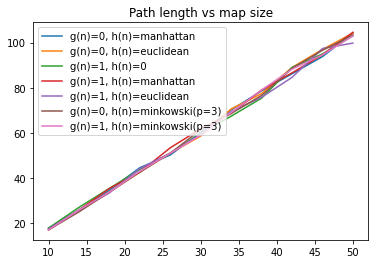

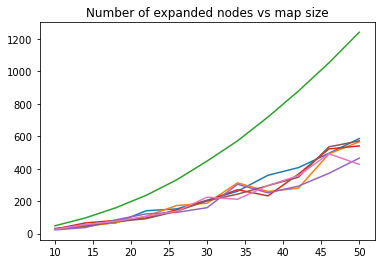

In [ ]:
import random
map_sizes = [x for x in range(10, 51, 4)]
trials = 10

h1, h2, h3, h4, h5, h6, h7 = [], [], [], [], [], [], []

for map_size in map_sizes:
    
    path1, path2, path3, path4, path5, path6, path7 = 0, 0, 0, 0, 0, 0, 0
    exp1, exp2, exp3, exp4, exp5, exp6, exp7 = 0, 0, 0, 0, 0, 0, 0
    
    for trial in range(trials):
        
        N = map_size+1
        S = (1,1)
        F = (N-2,N-2)
        maze1 = Maze(N, S, F)
        maze2 = Maze(N, S, F)
        maze3 = Maze(N, S, F)
        maze4 = Maze(N, S, F)
        maze5 = Maze(N, S, F)
        maze6 = Maze(N, S, F)
        maze7 = Maze(N, S, F)
        
        pf1 = pathfinder(maze=maze1, c = 0, h = 1)
        pf2 = pathfinder(maze=maze2, c = 0, h = 2)
        pf3 = pathfinder(maze=maze3, c = 1, h = 0)
        pf4 = pathfinder(maze=maze4, c = 1, h = 1)
        pf5 = pathfinder(maze=maze5, c = 1, h = 2)
        pf6 = pathfinder(maze=maze6, c = 0, h = 3)
        pf7 = pathfinder(maze=maze7, c = 1, h = 3)
        
        pf1.find_path()
        pf2.find_path()
        pf3.find_path()
        pf4.find_path()
        pf5.find_path()
        pf6.find_path()
        pf7.find_path()    
        
        path1 += len(pf1.get_path())
        exp1 += pf1.get_complexity()
        
        path2 += len(pf2.get_path())
        exp2 += pf2.get_complexity()
                    
        path3 += len(pf3.get_path())
        exp3 += pf3.get_complexity()
                    
        path4 += len(pf4.get_path())            
        exp4 += pf4.get_complexity()

        path5 += len(pf5.get_path())
        exp5 += pf5.get_complexity()
        
        path6 += len(pf6.get_path())            
        exp6 += pf6.get_complexity()
        
        path7 += len(pf7.get_path())
        exp7 += pf7.get_complexity()
    
    h1.append((path1/trials, exp1/trials))
    h2.append((path2/trials, exp2/trials))
    h3.append((path3/trials, exp3/trials))
    h4.append((path4/trials, exp4/trials))
    h5.append((path5/trials, exp5/trials))
    h6.append((path6/trials, exp6/trials))
    h7.append((path7/trials, exp7/trials))
    
plt.plot(map_sizes, [i[0] for i in h1])
plt.plot(map_sizes, [i[0] for i in h2])
plt.plot(map_sizes, [i[0] for i in h3])
plt.plot(map_sizes, [i[0] for i in h4])
plt.plot(map_sizes, [i[0] for i in h5])
plt.plot(map_sizes, [i[0] for i in h6])
plt.plot(map_sizes, [i[0] for i in h7])

plt.legend(['g(n)=0, h(n)=manhattan', 'g(n)=0, h(n)=euclidean', 'g(n)=1, h(n)=0', 'g(n)=1, h(n)=manhattan',
            'g(n)=1, h(n)=euclidean', 'g(n)=0, h(n)=minkowski(p=3)', 'g(n)=1, h(n)=minkowski(p=3)' ])

plt.title('Path length vs map size')
plt.show()
plt.plot(map_sizes, [i[1] for i in h1])
plt.plot(map_sizes, [i[1] for i in h2])
plt.plot(map_sizes, [i[1] for i in h3])
plt.plot(map_sizes, [i[1] for i in h4])
plt.plot(map_sizes, [i[1] for i in h5])
plt.plot(map_sizes, [i[1] for i in h6])
plt.plot(map_sizes, [i[1] for i in h7])
plt.title('Number of expanded nodes vs map size')
plt.show()

In [ ]:
import random

def plots (threshold):
    
    map_sizes = [x for x in range(10, 51, 4)]
    trials = 10
    h1, h2, h3, h4, h5, h6, h7 = [], [], [], [], [], [], []
    print(f"For threshold = {threshold}")
    for map_size in map_sizes:
    
        path1, path2, path3, path4, path5, path6, path7 = 0, 0, 0, 0, 0, 0, 0
        exp1, exp2, exp3, exp4, exp5, exp6, exp7 = 0, 0, 0, 0, 0, 0, 0
    
        for trial in range(trials):
        
            N = map_size+1
            S = (1,1)
            F = (N-2,N-2)
            maze1 = Maze(N=N, S=S, F=F, threshold=threshold)
            maze2 = Maze(N=N, S=S, F=F, threshold=threshold)
            maze3 = Maze(N=N, S=S, F=F, threshold=threshold)
            maze4 = Maze(N=N, S=S, F=F, threshold=threshold)
            maze5 = Maze(N=N, S=S, F=F, threshold=threshold)
            maze6 = Maze(N=N, S=S, F=F, threshold=threshold)
            maze7 = Maze(N=N, S=S, F=F, threshold=threshold)
        
            pf1 = pathfinder(maze=maze1, c = 0, h = 1)
            pf2 = pathfinder(maze=maze2, c = 0, h = 2)
            pf3 = pathfinder(maze=maze3, c = 1, h = 0)
            pf4 = pathfinder(maze=maze4, c = 1, h = 1)
            pf5 = pathfinder(maze=maze5, c = 1, h = 2)
            pf6 = pathfinder(maze=maze6, c = 0, h = 3)
            pf7 = pathfinder(maze=maze7, c = 1, h = 3)
        
            pf1.find_path()
            pf2.find_path()
            pf3.find_path()
            pf4.find_path()
            pf5.find_path()
            pf6.find_path()
            pf7.find_path()    
        
            path1 += len(pf1.get_path())
            exp1 += pf1.get_complexity()
        
            path2 += len(pf2.get_path())
            exp2 += pf2.get_complexity()
                    
            path3 += len(pf3.get_path())
            exp3 += pf3.get_complexity()
                    
            path4 += len(pf4.get_path())            
            exp4 += pf4.get_complexity()

            path5 += len(pf5.get_path())
            exp5 += pf5.get_complexity()
        
            path6 += len(pf6.get_path())            
            exp6 += pf6.get_complexity()
        
            path7 += len(pf7.get_path())
            exp7 += pf7.get_complexity()
    
        h1.append((path1/trials, exp1/trials))
        h2.append((path2/trials, exp2/trials))
        h3.append((path3/trials, exp3/trials))
        h4.append((path4/trials, exp4/trials))
        h5.append((path5/trials, exp5/trials))
        h6.append((path6/trials, exp6/trials))
        h7.append((path7/trials, exp7/trials))
    
    plt.plot(map_sizes, [i[0] for i in h1])
    plt.plot(map_sizes, [i[0] for i in h2])
    plt.plot(map_sizes, [i[0] for i in h3])
    plt.plot(map_sizes, [i[0] for i in h4])
    plt.plot(map_sizes, [i[0] for i in h5])
    plt.plot(map_sizes, [i[0] for i in h6])
    plt.plot(map_sizes, [i[0] for i in h7])

    plt.legend(['g(n)=0, h(n)=manhattan', 'g(n)=0, h(n)=euclidean', 'g(n)=1, h(n)=0', 'g(n)=1, h(n)=manhattan',
                'g(n)=1, h(n)=euclidean', 'g(n)=0, h(n)=minkowski(p=3)', 'g(n)=1, h(n)=minkowski(p=3)' ])

    plt.title('Path length vs map size')
    plt.show()
    plt.plot(map_sizes, [i[1] for i in h1])
    plt.plot(map_sizes, [i[1] for i in h2])
    plt.plot(map_sizes, [i[1] for i in h3])
    plt.plot(map_sizes, [i[1] for i in h4])
    plt.plot(map_sizes, [i[1] for i in h5])
    plt.plot(map_sizes, [i[1] for i in h6])
    plt.plot(map_sizes, [i[1] for i in h7])
    plt.title('Number of expanded nodes vs map size')
    plt.show()


For threshold = 0.5


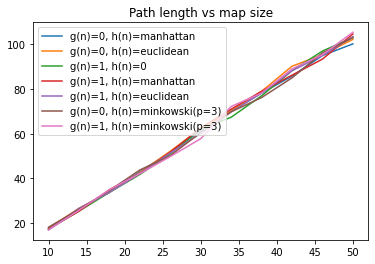

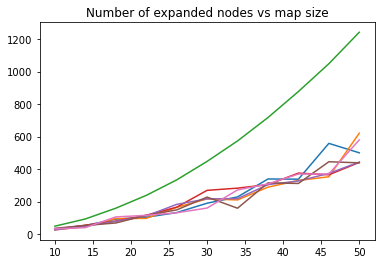

In [ ]:
plots(0.5)

For threshold = 0.6


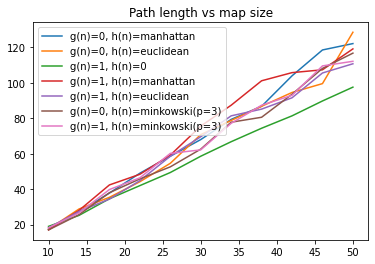

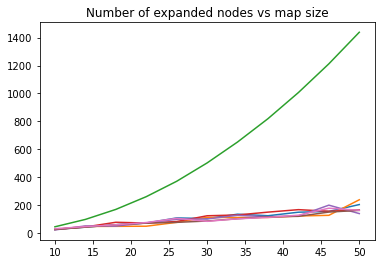

In [ ]:
plots(0.6)

For threshold = 0.7


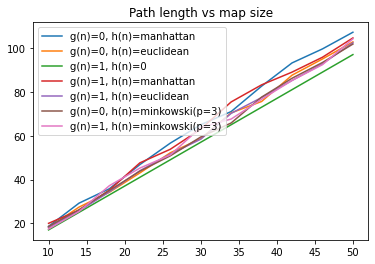

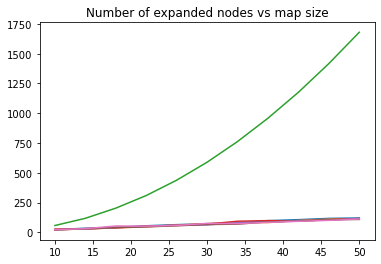

In [ ]:
plots(0.7)

For threshold = 0.8


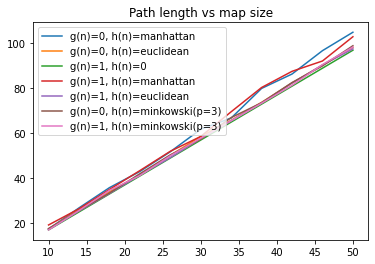

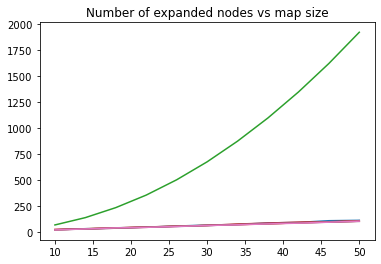

In [ ]:
plots(0.8)

For threshold = 0.9


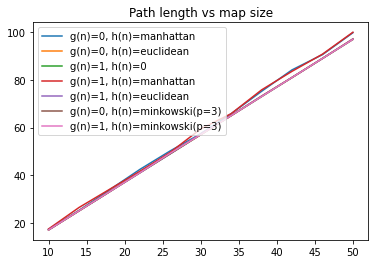

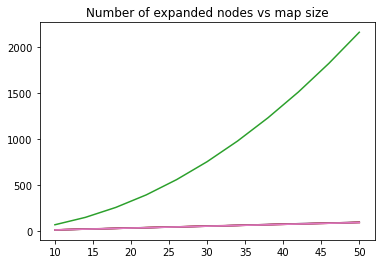

In [ ]:
plots(0.9)

## ŒúŒ≠œÅŒøœÇ 4

Œ£œÑŒø œÑŒ≠œÑŒ±œÅœÑŒø ŒºŒ≠œÅŒøœÇ œÑŒ∑œÇ ŒµœÅŒ≥Œ±œÉŒØŒ±œÇ œÉœÑŒø ŒªŒ±Œ≤œçœÅŒπŒΩŒ∏Œø œÖœÄŒ¨œÅœáŒµŒπ Œ≠ŒΩŒ± œÜŒ¨ŒΩœÑŒ±œÉŒºŒ± üëª! Œü œÉœÑœåœáŒøœÇ ŒµŒØŒΩŒ±Œπ ŒΩŒ± œÜœÑŒ¨œÉŒøœÖŒºŒµ œÉœÑŒø œÉŒ∑ŒºŒµŒØŒø œÑŒµœÅŒºŒ±œÑŒπœÉŒºŒøœç Œ±œÄŒøœÜŒµœçŒ≥ŒøŒΩœÑŒ±œÇ œÑŒø œÜŒ¨ŒΩœÑŒ±œÉŒºŒ±, œÑŒø ŒøœÄŒøŒØŒø ŒºŒ±œÇ Œ∫œÖŒΩŒ∑Œ≥Œ¨ŒµŒπ œÑœÅŒ≠œáŒøŒΩœÑŒ±œÇ œÉŒµ Œ∫Œ¨Œ∏Œµ Œ≤ŒÆŒºŒ± œÑŒøŒΩ Œ¥ŒπŒ∫œå œÑŒøœÖ Œë*. Œü Œ∫œéŒ¥ŒπŒ∫Œ±œÇ œÄŒøœÖ œÑœÅŒ≠œáŒµŒπ œÑŒø œÜŒ¨ŒΩœÑŒ±œÉŒºŒ± ''Agent'' œÉŒ±œÇ Œ¥ŒØŒΩŒµœÑŒ±Œπ Œ≠œÑŒøŒπŒºŒøœÇ.

ŒìŒπŒ± œÑŒ∑ŒΩ Œ±œÄŒøœÜœÖŒ≥ŒÆ œÑŒøœÖ œÜŒ±ŒΩœÑŒ¨œÉŒºŒ±œÑŒøœÇ Œ∏Œ± œÖŒªŒøœÄŒøŒπŒÆœÉŒøœÖŒºŒµ œÑŒøŒΩ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø ŒëŒí. Œ£œÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒ±, œÉŒ±œÇ Œ¥ŒØŒΩŒµœÑŒ±Œπ Œ∑ Œ∫ŒªŒ¨œÉŒ∑ ''ŒëŒíagent'' œÉœÑŒ∑ŒΩ ŒøœÄŒøŒØŒ± Œ∫Œ±ŒªŒµŒØœÉœÑŒµ ŒΩŒ± œÉœÖŒºœÄŒªŒ∑œÅœéœÉŒµœÑŒµ œÑŒπœÇ Œ∫ŒπŒΩŒÆœÉŒµŒπœÇ œÑŒøœÖ minimizing_player (œåœÄœâœÇ Œ¥ŒπŒ¥Œ±œáŒ∏ŒÆŒ∫Œ±œÑŒµ œÉœÑŒø ŒºŒ¨Œ∏Œ∑ŒºŒ±), Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ œÑœâŒΩ Œ±ŒΩœÑŒØœÉœÑŒøŒπœáœâŒΩ Œ∫ŒπŒΩŒÆœÉŒµœâŒΩ œÑŒøœÖ maximizing_player. Œ£œÑŒ± œÄŒªŒ±ŒØœÉŒπŒ± œÑŒøœÖ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖ Œ±œÖœÑŒøœç Œ∏Œ± œáœÅŒµŒπŒ±œÉœÑŒµŒØ ŒΩŒ± ŒøœÅŒØœÉŒµœÑŒµ ŒºŒπŒ± ŒµœÖœÅŒπœÉœÑŒπŒ∫ŒÆ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ Œ∑ ŒøœÄŒøŒØŒ± ŒµŒ∫œÑŒπŒºŒ¨ œÑŒø Œ∫œåœÉœÑŒøœÇ œÑŒ∑œÇ ŒµœÄœåŒºŒµŒΩŒ∑œÇ Œ∫Œ±œÑŒ¨œÉœÑŒ±œÉŒ∑œÇ œÉœÖŒΩœÖœÄŒøŒªŒøŒ≥ŒØŒ∂ŒøŒΩœÑŒ±œÇ œÑŒ∑ŒΩ Œ±œÄœåœÉœÑŒ±œÉŒ∑ œÑœåœÉŒø Œ±œÄœå œÑŒø œÉœÑœåœáŒø Œ∫Œ±Œπ Œ±œÄœå œÑŒø œÜŒ¨ŒΩœÑŒ±œÉŒºŒ±. 

Œ†ŒµœÅŒπŒ≥œÅŒ¨œàœÑŒµ œÉœÑŒø Œ∫Œ±œÑŒ¨ŒªŒªŒ∑ŒªŒø markdown Œ∫ŒµŒªŒØ œÑŒ∑ œÉœÖŒªŒªŒøŒ≥ŒπœÉœÑŒπŒ∫ŒÆ œÄŒøœÅŒµŒØŒ± Œ≥ŒπŒ± œÑŒπœÇ ŒµœÄŒπŒªŒøŒ≥Œ≠œÇ œÉŒ±œÇ œåœÉŒøŒΩ Œ±œÜŒøœÅŒ¨ œÑŒ∑ŒΩ ŒµœÖœÅŒπœÉœÑŒπŒ∫ŒÆ. Œ†œéœÇ œÖœÄŒøŒªŒøŒ≥ŒØœÉŒ±œÑŒµ œÑŒπœÇ Œ±œÄŒøœÉœÑŒ¨œÉŒµŒπœÇ (ŒºŒµ ŒµŒ∫œÑŒØŒºŒ∑œÉŒ∑/œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫ŒÆ ŒºŒµœÑœÅŒπŒ∫ŒÆ); ŒëŒΩŒ±œÜŒ≠œÅŒµœÑŒµ Œ±ŒΩŒ±ŒªœÖœÑŒπŒ∫Œ¨ œÑŒ± Œ±œÄŒøœÑŒ≠ŒªŒµœÉŒºŒ±œÑŒ± Œ∫Œ±Œπ œÑŒπœÇ œÄŒ±œÅŒ±œÑŒ∑œÅŒÆœÉŒµŒπœÇ œÉŒ±œÇ œÉœáŒµœÑŒπŒ∫Œ¨ ŒºŒµ œÑŒπœÇ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ ŒµœÄŒπŒªŒøŒ≥Œ≠œÇ. ŒúŒµŒ≥Œ±ŒªœçœÑŒµœÅŒ∑ œÉŒ∑ŒºŒ±œÉŒØŒ± Œ≠œáŒµŒπ Œø œÄŒµŒπœÅŒ±ŒºŒ±œÑŒπœÉŒºœåœÇ Œ∫Œ±Œπ Œ∑ Œ±ŒΩŒ±œÜŒøœÅŒ¨ œÑœâŒΩ Œ±œÄŒøœÑŒµŒªŒµœÉŒºŒ¨œÑœâŒΩ, œåœÉŒøŒΩ Œ±œÜŒøœÅŒ¨ Œ±œÜŒøœÅŒ¨ œÑŒ∑ŒΩ ŒµœÖœÅŒπœÉœÑŒπŒ∫ŒÆ, œÄŒ±œÅŒ¨ Œ∑ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑ œÑŒ∑œÇ Œ∫Œ±ŒªœçœÑŒµœÅŒ∑œÇ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑œÇ. Œ©œÇ Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ± Œ∂Œ∑œÑŒµŒØœÑŒ±Œπ ŒΩŒ± œÄŒ±œÅŒ±Œ∏Œ≠œÉŒµœÑŒµ: œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫Œ¨ gifs Œ∫Œ±Œπ œáœÅœåŒΩŒøœÖœÇ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑œÇ. ŒîŒπŒ∫Œ±ŒπŒøŒªŒøŒ≥ŒµŒØœÉœÑŒµ Œ≥ŒπŒ±œÑŒØ Œø Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºœåœÇ œÉŒ±œÇ Œ¥ŒøœÖŒªŒµœçŒµŒπ ŒøœÅŒ∏Œ¨. 

**Œ†Œ°ŒüŒ£ŒüŒßŒó!** Œ£œÑŒø 4Œø ŒºŒ≠œÅŒøœÇ ŒøŒπ ŒªŒ±Œ≤œçœÅŒπŒΩŒ∏ŒøŒπ œÄŒøœÖ Œ∏Œ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒÆœÉŒµœÑŒµ œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± ŒµŒØŒΩŒ±Œπ Œ±œÅŒ±ŒπŒøŒØ œâœÇ œÄœÅŒøœÇ œÑŒ± ŒµŒºœÄœåŒ¥ŒπŒ±. ŒëŒΩ œÑŒ± œÖœÄŒ¨œÅœáŒøŒΩœÑŒ± ŒºŒøŒΩŒøœÄŒ¨œÑŒπŒ± œÄœÅŒøœÇ œÑŒø œÉœÑœåœáŒø ŒµŒØŒΩŒ±Œπ ŒªŒØŒ≥Œ±, Œ∏Œ± ŒµŒØŒΩŒ±Œπ Œ¥œçœÉŒ∫ŒøŒªŒø ŒΩŒ± ŒæŒµœÜœçŒ≥ŒµœÑŒµ Œ±œÄœå œÑŒø œÜŒ¨ŒΩœÑŒ±œÉŒºŒ± Œ±ŒΩŒµŒæŒ±œÅœÑŒÆœÑœâœÇ œÖŒªŒøœÄŒøŒØŒ∑œÉŒ∑œÇ.

## ŒúŒµœÅŒøœÇ 4

Œ†œÅœéœÑŒ±, œÉŒ±œÇ Œ¥ŒØŒΩŒµœÑŒ±Œπ Œ±œÖœÑŒøœçœÉŒπŒøœÇ Œø Œ∫œéŒ¥ŒπŒ∫Œ±œÇ œÑŒøœÖ œÜŒ±ŒΩœÑŒ¨œÉŒºŒ±œÑŒøœÇ. Œ§Œø œÜŒ¨ŒΩœÑŒ±œÉŒºŒ± ŒºŒ±œÇ Œ∫œÖŒΩŒ∑Œ≥Œ¨ŒµŒπ œÑœÅŒ≠œáŒøŒΩœÑŒ±œÇ Œë* ŒºŒµ œÉœÑœåœáŒø œÑŒ∑ Œ∏Œ≠œÉŒ∑ ŒºŒ±œÇ.

In [ ]:
class Agent:
  def __init__(self,S,grid,color, name = ""):
    self.agent_name = name
    self.location = S
    self.color=color
    self.maze = grid
    self.maze.agents.append(self)
    self.maze.grid[S]=1
    self.path=[]

  def find_path(self,F):
    c = lambda x,y: 1 
    h = euclidean
    pf = pathfinder(self.location, F, self.maze, c, h, visualize=False)
    self.path = pf.path


  def move(self):
    if len(self.path)<1:
      return
    if self.location==self.path[0] and len(self.path)>1:
      self.location=self.path[1]
      self.path = self.path[2:]
    else:
      self.location=self.path[0]
      self.path=self.path[1:]

  def move_to(self, loc):
    self.location = loc

Œ£œÑŒ∑ œÉœÖŒΩŒ≠œáŒµŒπŒ±, Œ¥ŒØŒΩŒµœÑŒ±Œπ Œø Œ∫œéŒ¥ŒπŒ∫Œ±œÇ Œ≥ŒπŒ± œÑŒøŒΩ agent œÄŒøœÖ œÑœÅŒ≠œáŒµŒπ ŒΩŒ± ŒæŒµœÜœçŒ≥ŒµŒπ. Œü ABagent œÑœÅŒ≠œáŒµŒπ ŒëŒí ŒºŒµ œÉŒ∫ŒøœÄœå ŒΩŒ± œÜœÑŒ¨œÉŒµŒπ œÉœÑŒøŒΩ œÑŒµœÅŒºŒ±œÑŒπœÉŒºœå œáœâœÅŒØœÇ ŒΩŒ± œÑŒøŒΩ œÄŒπŒ¨œÉŒµŒπ œÑŒø œÜŒ¨ŒΩœÑŒ±œÉŒºŒ±. ŒöŒ±ŒªŒµŒØœÉœÑŒµ ŒΩŒ± œÉœÖŒºœÄŒªŒ∑œÅœéœÉŒµœÑŒµ œÑŒ± œÉŒ∑ŒºŒµŒØŒ± œÄŒøœÖ œÄŒ±œÅŒ±ŒªŒµŒØœÄŒøŒΩœÑŒ±Œπ. ŒîœéœÉœÑŒµ ŒπŒ¥ŒπŒ±ŒØœÑŒµœÅŒ∑ œÄœÅŒøœÉŒøœáŒÆ œÉœÑŒ∑ŒΩ ŒµœÖœÅŒπœÉœÑŒπŒ∫ŒÆ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑. ŒïŒæŒ∑Œ≥ŒµŒØœÉœÑŒµ œÑŒπœÇ ŒµœÄŒπŒªŒøŒ≥Œ≠œÇ œÉŒ±œÇ, œåœÄœâœÇ œÄŒµœÅŒπŒ≥œÅŒ¨œÜŒµœÑŒ±Œπ œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ.

In [ ]:
class ABagent:
  def __init__(self, S, grid, color, name = ""):
    self.agent_name = name
    self.location = S
    self.color=color
    self.maze = grid
    self.maze.agents.append(self)
    self.maze.grid[S]=1
    self.path=[]

  def get_best_action(self, ghosts, depth = 3):
      best_action = None
      best_score = float("-inf") #you can use this for debugging
      alpha = float("-inf")
      beta = float("inf")

      best_score, best_action = self.alpha_beta_agent(self.maze, self.location, ghosts, depth, alpha, beta, True)

      return best_action

  def alpha_beta_agent(self, maze, agent_pos, ghost_positions, depth, alpha, beta, maximizing_player=True):
      if depth == 0 or self.is_win(maze, agent_pos) or self.is_lose(agent_pos, ghost_positions):
          # Return the heuristic value if we've reached the maximum depth or the game is over
          return self.heuristic_AB(map, agent_pos, ghost_positions), agent_pos

      if maximizing_player:
          # Agent is the maximizing player
          best_score = float("-inf")
          best_action = None
          for successor_state in maze.adjacent_no_walls(agent_pos):
              score, _ = self.alpha_beta_agent(maze, successor_state, ghost_positions, depth - 1, alpha, beta, False)
              if score > best_score:
                  best_score = score
                  best_action = successor_state
              alpha = max(alpha, score)
              if beta <= alpha:
                  break
          return best_score, best_action
      else:
          # Ghosts are the minimizing players
          ### YOUR CODE HERE \/
         
          ### YOUR CODE HERE /\

  
  def is_win(self, maze, agent):
      ### YOUR CODE HERE \/
      return ???
      ### YOUR CODE HERE /\

  def is_lose(self, agent, ghosts):
      ### YOUR CODE HERE \/
      return ???
      ### YOUR CODE HERE /\

  def heuristic_AB(self, map, agent_pos, ghost_positions):
      ### YOUR CODE HERE \/
      
      ### YOUR CODE HERE /\

  def move_to(self, loc):
    self.location = loc

IndentationError: expected an indented block (Temp/ipykernel_2476/707433134.py, line 46)

Œ¶œÑŒπŒ¨œáŒΩŒøœÖŒºŒµ Œ±œÅŒ±Œπœå œáŒ¨œÅœÑŒ∑ Œ∫Œ±Œπ ŒøœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒøœÖœÇ agents.

In [ ]:
#create a sparse map with many paths, like the one below
map = Maze(33, (1,1), (31,31), threshold=???)
map.draw_map()

In [ ]:
x, y = np.random.choice(range(1, 31)), np.random.choice(range(1, 31))
ghost = (Agent((x, y), map, [255,30,10], "ghost"))
                  
a1 = ABagent((2,1), map,[30,10,255], "agentAB")

map.draw_map()

Œ†Œ±œÅŒ±Œ∫Œ¨œÑœâ, œÖŒªŒøœÄŒøŒπŒµŒØœÑŒ±Œπ œÑŒø Œ∫œÖŒΩŒ∑Œ≥Œ∑œÑœå. ŒïŒΩŒ¥ŒµŒπŒ∫œÑŒπŒ∫Œ¨ ŒøœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒ∑ŒΩ œÄŒ±œÅŒ¨ŒºŒµœÑœÅŒø depth œÑŒøœÖ ŒëŒí ŒØœÉŒ∑ ŒºŒµ 5. 

Œ†œÅŒøœÉŒøœáŒÆ: œåœÄœâœÇ œÉŒ∑ŒºŒµŒπœéŒΩŒµœÑŒ±Œπ, ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± Œ∫Œ¨ŒΩŒøœÖŒºŒµ œÑŒøœÖœÇ œÄŒ±ŒØŒ∫œÑŒµœÇ ŒΩŒ± œÑœÅŒ≠œáŒøœÖŒΩ ŒºŒµ Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫Œ≠œÇ œÑŒ±œáœçœÑŒ∑œÑŒµœÇ. ŒïŒØŒΩŒ±Œπ œÄœÅŒøœÑŒπŒºŒ∑œÑŒ≠Œø ŒΩŒ± Œ∫œÅŒ±œÑŒÆœÉŒµœÑŒµ œÑŒ∑ŒΩ œÑŒ±œáœçœÑŒ∑œÑŒ± ŒØœÉŒ∑ (œåœÄœâœÇ œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ). ŒîŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫Œ¨, Œ∏Œ± œáœÅŒµŒπŒ±œÉœÑŒµŒØ ŒΩŒ± œÑœÅŒøœÄŒøœÄŒøŒπŒÆœÉŒµœÑŒµ œÑŒøŒΩ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø ŒëŒí.

ŒúŒµœÑœÅŒµŒØœÉœÑŒµ œÑŒø œáœÅœåŒΩŒø ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑œÇ Œ∫Œ±Œπ œÄŒ±œÅŒøœÖœÉŒπŒ¨œÉœÑŒµ œÄŒ±œÅŒ±Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒ±. ŒìŒπŒ±œÑŒØ Œø Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ œÉŒ±œÇ Œ¥ŒøœÖŒªŒµœçŒµŒπ;

In [ ]:
vis=visualization((1,1),(31,30))

visited = [a1.location] #HINT: this might be helpful to you

for i in range(100):
  if a1.location==(31,31):
    print("Win")
    break

  if a1.location == ghost.location:
    print("Lose")
    break

  if i%1==0: #controls agent speed
    best_move = a1.get_best_action(map, a1.location, [ghost.location], 5)
    a1.move_to(best_move)
    visited.append(a1.location)

  if i%1==0: #controls ghost speed
    ghost.find_path(a1.location)
    ghost.move()

  im = map.draw_map(return_image=True)
  vis.images.append(im)

In [ ]:
vis.create_gif(fps=1)
vis.show_gif()

## ŒúŒ≠œÅŒøœÇ 5 (bonus)

Œ£œÑŒø œÄŒ≠ŒºœÄœÑŒø Œ∫Œ±Œπ œÑŒµŒªŒµœÖœÑŒ±ŒØŒø ŒºŒ≠œÅŒøœÇ œÑŒ∑œÇ ŒµœÅŒ≥Œ±œÉŒØŒ±œÇ œÉŒ¨œÇ Œ¥ŒØŒΩŒµœÑŒ±Œπ Œ∑ Œ¥œÖŒΩŒ±œÑœåœÑŒ∑œÑŒ± ŒΩŒ± Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒ¨œÉŒµœÑŒµ ŒªŒ±Œ≤œÖœÅŒØŒΩŒ∏ŒøœÖœÇ ŒºŒµ œÑŒø œáŒ≠œÅŒπ, Œ∂œâŒ≥œÅŒ±œÜŒØŒ∂ŒøŒΩœÑŒ±œÇ. ŒìŒπŒ± œÑŒø œÉŒ∫ŒøœÄœå Œ±œÖœÑœå œÉŒ±œÇ Œ¥ŒØŒΩŒµœÑŒ±Œπ Œ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ draw(filename='filename.png') Œ∑ ŒøœÄŒøŒØŒ± œÄŒ±œÅŒ¨Œ≥ŒµŒπ Œ≠ŒΩŒ± interactive grid œéœÉœÑŒµ ŒΩŒ± œÉœáŒ∑ŒºŒ±œÑŒØœÉŒµœÑŒµ œÑŒø ŒªŒ±Œ≤œçœÅŒπŒΩŒ∏Œø. ŒòŒµœâœÅŒÆœÉœÑŒµ œâœÇ ŒºŒ±œçœÅŒø œÑŒø œáœÅœéŒºŒ± œÑŒøœÖ ŒµŒºœÄŒøŒ¥ŒØŒøœÖ, œÄœÅŒ¨œÉŒπŒΩŒø œÑŒ∑ŒΩ Œ±œÜŒµœÑŒ∑œÅŒØŒ± Œ∫Œ±Œπ Œ∫œåŒ∫Œ∫ŒπŒΩŒø œÑŒø œÉœÑœåœáŒø, Œ∫Œ±Œπ œÄŒ±œÑŒÆœÉœÑŒµ finish Œ≥ŒπŒ± ŒΩŒ± ŒøŒªŒøŒ∫ŒªŒ∑œÅœâŒ∏ŒµŒØ Œ∑ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑ œÑŒøœÖ œÑœÅŒ≠œáŒøŒΩœÑŒøœÇ Œ∫ŒµŒªŒπŒøœç. Œ£Œµ œÄŒµœÅŒØœÄœÑœâœÉŒ∑ œÄŒøœÖ Œ∏Œ≠ŒªŒµœÑŒµ ŒΩŒ± œÄŒ±œÅŒ¨ŒæŒµœÑŒµ ŒΩŒ≠Œø ŒªŒ±Œ≤œçœÅŒπŒΩŒ∏Œø, Œ±œÄŒªŒ¨ ŒæŒ±ŒΩŒ±œÑœÅŒ≠ŒæœÑŒµ œÑŒø Œ∫ŒµŒªŒØ, ŒµœÄŒπŒªŒ≠ŒæœÑŒµ œÑŒ± œÑŒµœÑœÅŒ¨Œ≥œâŒΩŒ± Œ∫Œ±Œπ œÄŒ±œÑŒÆœÉœÑŒµ finish. ŒöŒ¨Œ∏Œµ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑ Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçŒµŒπ œÑŒ∑ŒΩ ŒµŒπŒ∫œåŒΩŒ± œÉŒµ ŒºŒøœÅœÜŒÆ png œÉŒµ œåŒΩŒøŒºŒ± œÄŒøœÖ ŒºœÄŒøœÅŒµŒØœÑŒµ ŒΩŒ± Œ∫Œ±Œ∏ŒøœÅŒØœÉŒµœÑŒµ ŒºŒ≠œÉœâ œÑŒøœÖ filename (œÑŒøœÄŒøŒ∏ŒµœÑœéŒΩœÑŒ±œÇ Œ∫Œ±Œπ œÑŒ∑ŒΩ Œ∫Œ±œÑŒ¨ŒªŒ∑ŒæŒ∑ .png) Œ∫Œ±œÑŒ¨ œÑŒ∑ŒΩ Œ∫ŒªŒÆœÉŒ∑ œÑŒ∑œÇ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑œÇ.  

ŒöŒ±ŒªŒµŒØœÉœÑŒµ ŒªŒøŒπœÄœåŒΩ ŒΩŒ± **Œ∫Œ±œÑŒ±œÉŒ∫ŒµœÖŒ¨œÉŒµœÑŒµ** Œ∫Œ±Œπ ŒΩŒ± **œÉœáŒøŒªŒπŒ¨œÉŒµœÑŒµ** œÑŒøœÖœÇ œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ 5 ŒªŒ±Œ≤œÖœÅŒØŒΩŒ∏ŒøœÖœÇ, ŒøŒπ ŒøœÄŒøŒØŒøŒπ Œ∏Œ± ŒπŒ∫Œ±ŒΩŒøœÄŒøŒπŒøœçŒΩ œÑŒπœÇ œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ œÉœÖŒΩŒ∏ŒÆŒ∫ŒµœÇ:


*   **ŒõŒ±Œ≤œçœÅŒπŒΩŒ∏ŒøœÇ 1**: Œü Hill-climbing Œ¥ŒµŒΩ Œ≤œÅŒØœÉŒ∫ŒµŒπ ŒºŒøŒΩŒøœÄŒ¨œÑŒπ Œ±œÄœå œÑŒ∑ŒΩ Œ±œÜŒµœÑŒ∑œÅŒØŒ± œÉœÑŒø œÉœÑœåœáŒø.
*   **ŒõŒ±Œ≤œçœÅŒπŒΩŒ∏ŒøœÇ 2**: Œü Œë* Œ±œÅŒ≥ŒµŒØ œåœÉŒø œÑŒø Œ¥œÖŒΩŒ±œÑœåŒΩ œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒø ŒΩŒ± Œ≤œÅŒµŒπ œÑŒø Œ≤Œ≠ŒªœÑŒπœÉœÑŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ Œ±ŒΩŒµŒæŒ±œÅœÑŒÆœÑœâœÇ œÑŒ∑œÇ ŒºŒµœÑœÅŒπŒ∫ŒÆœÇ Œ±œÄœåœÉœÑŒ±œÉŒ∑œÇ œÄŒøœÖ œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒµŒØœÑŒ±Œπ œâœÇ ŒµœÖœÅŒπœÉœÑŒπŒ∫ŒÆ. Œ£Œµ œÑŒπ ŒµŒØŒ¥ŒøœÖœÇ ŒºŒøŒΩŒøœÄŒ¨œÑŒπ Œ∑ ŒµœÄŒπŒªŒøŒ≥ŒÆ Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫ŒÆœÇ ŒºŒµœÑœÅŒπŒ∫ŒÆœÇ Œ±œÄœåœÉœÑŒ±œÉŒ∑œÇ (ŒïœÖŒ∫ŒªŒØŒ¥ŒµŒπŒ±/Manhattan) œâœÇ ŒµœÖœÅŒπœÉœÑŒπŒ∫ŒÆœÇ ŒøŒ¥Œ∑Œ≥ŒµŒØ œÑŒøŒΩ Œë* ŒΩŒ± Œ≤œÅŒØœÉŒ∫ŒµŒπ œÑŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ œÄŒπŒø Œ≥œÅŒÆŒ≥ŒøœÅŒ±;
*   **ŒõŒ±Œ≤œçœÅŒπŒΩŒ∏ŒøœÇ 3**: Œü Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøœÇ Œ¨œÄŒªŒ∑œÉœÑŒ∑œÇ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ œÄœÅœéœÑŒ± œÉœÑŒø Œ∫Œ±ŒªœçœÑŒµœÅŒø (greedy best first) Œ±œÅŒ≥ŒµŒØ œÉŒ∑ŒºŒ±ŒΩœÑŒπŒ∫Œ¨ œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒø Œ±œÄœå œÑŒøŒΩ Œë* Œ≥ŒπŒ± ŒΩŒ± Œ∫Œ±œÑŒ±ŒªŒÆŒæŒµŒπ œÉœÑŒø œÉœÑœåœáŒø. Œ£Œµ œÄŒøŒπŒ± œÄŒµœÅŒØœÄœÑœâœÉŒ∑ ŒøŒπ Œ¥œçŒø Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøŒπ Œ∏Œ± œÉœÖŒºœÄŒµœÅŒπœÜŒ≠œÅŒøŒΩœÑŒ±ŒΩ ŒºŒµ œÑŒøŒΩ ŒØŒ¥ŒπŒø œÑœÅœåœÄŒø;
*   **ŒõŒ±Œ≤œçœÅŒπŒΩŒ∏ŒøœÇ 4**: Œü Œë* Œ∫Œ±œÑŒ±œÜŒ≠œÅŒΩŒµŒπ ŒΩŒ± Œ≤œÅŒµŒπ œÑŒø ŒºŒøŒΩŒøœÄŒ¨œÑŒπ œÄœÅŒøœÇ œÑŒø œÉœÑœåœáŒø œÉŒ∑ŒºŒ±ŒΩœÑŒπŒ∫Œ¨ œÄŒπŒø Œ≥œÅŒÆŒ≥ŒøœÅŒ± Œ±œÄœå œÑŒøŒΩ Dijkstra. Œü œáœéœÅŒøœÇ œÄœÅŒ≠œÄŒµŒπ Œ±ŒΩŒ±Œ≥Œ∫Œ±œÉœÑŒπŒ∫Œ¨ ŒΩŒ± œÄŒµœÅŒπŒ≠œáŒµŒπ ŒµŒºœÄœåŒ¥ŒπŒ±. Œ†œéœÇ ŒµœÄŒ∑œÅŒµŒ¨Œ∂ŒµŒπ œÑŒø ŒºŒ≠Œ≥ŒµŒ∏ŒøœÇ/ŒµŒØŒ¥ŒøœÇ œÑŒøœÖ ŒµŒºœÄŒøŒ¥ŒØŒøœÖ œÑŒøŒΩ Œ±œÅŒπŒ∏Œºœå Œ≤Œ∑ŒºŒ¨œÑœâŒΩ œÄŒøœÖ œáœÅŒµŒπŒ¨Œ∂ŒµœÑŒ±Œπ Œø Dijsktra Œ∫Œ±Œπ œÄœéœÇ œÑŒøŒΩ Œ±œÅŒπŒ∏Œºœå Œ≤Œ∑ŒºŒ¨œÑœâŒΩ œÑŒøœÖ Œë*;
*   **ŒõŒ±Œ≤œçœÅŒπŒΩŒ∏ŒøœÇ 5**: Œü Œë* Œ∫Œ±Œπ Œø Dijkstra œÜœÑŒ¨ŒΩŒøœÖŒΩ œÉœÑŒø œÉœÑœåœáŒø œÄœÅŒ±Œ≥ŒºŒ±œÑŒøœÄŒøŒπœéŒΩœÑŒ±œÇ œÑŒøŒΩ ŒØŒ¥ŒπŒø Œ±Œ∫œÅŒπŒ≤œéœÇ Œ±œÅŒπŒ∏Œºœå Œ≤Œ∑ŒºŒ¨œÑœâŒΩ Œ≥ŒπŒ± œÑŒ∑ŒΩ œÄœÅŒøœÉŒ≠Œ≥Œ≥ŒπœÉŒ∑ œÑŒ∑œÇ Œ≤Œ≠ŒªœÑŒπœÉœÑŒ∑œÇ Œ¥ŒπŒ±Œ¥œÅŒøŒºŒÆœÇ. Œ£Œ∑ŒºŒµŒØœâœÉŒ∑: **Œ±Œ≥ŒΩŒøŒÆœÉœÑŒµ** œÑŒ∑ŒΩ œÑŒµœÑœÅŒπŒºŒºŒ≠ŒΩŒ∑ œÄŒµœÅŒØœÄœÑœâœÉŒ∑ œåœÄŒøœÖ Œø Œë* œÉœÖŒºœÄŒµœÅŒπœÜŒ≠œÅŒµœÑŒ±Œπ œåœÄœâœÇ Œø Dijkstra (h(n)=0). 


Œü Œë* œÉŒµ œåŒªŒµœÇ œÑŒπœÇ œÄŒµœÅŒπœÄœÑœéœÉŒµŒπœÇ œÄœÅŒ±Œ≥ŒºŒ±œÑŒøœÄŒøŒπŒµŒØ œÑŒ∑ Œ≤Œ≠ŒªœÑŒπœÉœÑŒ∑ Œ¥œÖŒΩŒ±œÑŒÆ Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑.   


ŒìŒπŒ± Œ∫Œ¨Œ∏Œµ ŒªŒ±Œ≤œçœÅŒπŒΩŒ∏Œø œÄŒøœÖ œÉœáŒ∑ŒºŒ±œÑŒØŒ∂ŒµœÑŒµ, Œ¥œéœÉœÑŒµ ŒºŒπŒ± œÉœçŒΩœÑŒøŒºŒ∑ ŒµŒæŒÆŒ≥Œ∑œÉŒ∑ Œ≥ŒπŒ± œÑŒ∑ŒΩ ŒµœÄŒπŒªŒøŒ≥ŒÆ œÉŒ±œÇ.  

**Œ†Œ°ŒüŒ£ŒüŒßŒó:** œÑŒø output œÑœâŒΩ Œ∫ŒµŒªŒπœéŒΩ œÄŒøœÖ œÉœáŒ∑ŒºŒ±œÑŒØŒ∂ŒµœÑŒµ Œ¥ŒπŒ±œÑŒ∑œÅŒµŒØœÑŒ±Œπ Œ≥ŒπŒ± œÄŒµœÅŒπŒøœÅŒπœÉŒºŒ≠ŒΩŒø œáœÅŒøŒΩŒπŒ∫œå Œ¥ŒπŒ¨œÉœÑŒ∑ŒºŒ± œÉœÑŒø notebook, Œ≥Œπ Œ±œÖœÑœå Œ∫Œ±ŒªŒµŒØœÉœÑŒµ ŒΩŒ± Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçœÉŒµœÑŒµ œÑŒ∑ œÜœâœÑŒøŒ≥œÅŒ±œÜŒØŒ± (œÑŒø œÄœÅŒ±Œ≥ŒºŒ±œÑŒøœÄŒøŒπŒµŒØ Œ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ draw()) Œ∫Œ±Œπ ŒΩŒ± œÑŒ∑ ŒºŒµœÑŒ±œÜŒ≠œÅŒµœÑŒµ œÉœÑŒø Œ±ŒΩŒ¨ŒªŒøŒ≥Œø markdown œéœÉœÑŒµ ŒΩŒ± ŒºœÄŒøœÅŒ≠œÉŒøœÖŒºŒµ ŒΩŒ± œÑŒ∑ŒΩ Œ±ŒæŒπŒøŒªŒøŒ≥ŒÆœÉŒøœÖŒºŒµ.


Œ£œÑŒ∑ œÉœÖŒΩŒ≠œáŒµŒπŒ±, Œ∫Œ±ŒªŒµŒØœÉœÑŒµ ŒΩŒ± œÑœÅŒ≠ŒæŒµœÑŒµ œÑŒøœÖœÇ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖœÇ pathfinding œÄŒ¨ŒΩœâ œÉœÑŒøœÖœÇ œáŒ¨œÅœÑŒµœÇ œÄŒøœÖ œÉœáŒ∑ŒºŒ±œÑŒØœÉŒ±œÑŒµ. ŒìŒπŒ± œÑŒø œÉŒ∫ŒøœÄœå Œ±œÖœÑœå, ŒºŒµœÑŒ¨ œÑŒ∑ŒΩ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑ œÑŒ∑œÇ draw() Œ∫Œ±ŒªŒµŒØœÑŒµ œÑŒ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ draw_grid() œÄŒøœÖ ŒºŒµœÑŒ±œÑœÅŒ≠œÄŒµŒπ œÑŒ∑ŒΩ ŒµŒπŒ∫œåŒΩŒ± œÄŒøœÖ œÉœáŒ∑ŒºŒ±œÑŒØœÉŒ±œÑŒµ œÉŒµ œáŒ¨œÅœÑŒ∑ œÄŒ¨ŒΩœâ œÉœÑŒøŒΩ ŒøœÄŒøŒØŒø ŒºœÄŒøœÅŒøœçŒΩ ŒΩŒ± œÑœÅŒ≠ŒæŒøœÖŒΩ ŒøŒπ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒøŒπ ŒºŒµ œáœÅŒÆœÉŒ∑ œÑŒ∑œÇ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑œÇ pathfinder(). ŒßœÅŒµŒπŒ¨Œ∂ŒµœÑŒ±Œπ ŒΩŒ± ŒµœÄŒπŒªŒ≠ŒæŒµœÑŒµ Œ∫Œ±œÑŒ¨ŒªŒªŒ∑ŒªŒ± œÑŒ± ŒøœÅŒØœÉŒºŒ±œÑŒ± œÑŒ∑œÇ pathfinder œéœÉœÑŒµ ŒΩŒ± Œ∫Œ±ŒªŒ≠œÉŒµœÑŒµ œÑŒø œÉœâœÉœÑœå Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø Œ±ŒΩŒ±Œ∂ŒÆœÑŒ∑œÉŒ∑œÇ œÉŒµ Œ∫Œ¨Œ∏Œµ ŒµœÅœéœÑŒ∑ŒºŒ±. ŒïŒ∫œÑŒµŒªŒ≠œÉœÑŒµ œÑŒ± Œ±ŒΩœÑŒØœÉœÑŒøŒπœáŒ± Œ∫ŒµŒªŒπŒ¨ ŒºŒµ œÑŒøŒΩ Œ∫œéŒ¥ŒπŒ∫Œ± œÄŒøœÖ œÉŒ±œÇ Œ¥ŒØŒΩŒµœÑŒ±Œπ Œ∫Œ±Œπ œÄŒ±œÅŒøœÖœÉŒπŒ¨œÉœÑŒµ œÑŒ∑ŒΩ Œ≠ŒæŒøŒ¥Œø Œ±œÖœÑœéŒΩ. Œ¶œÖœÉŒπŒ∫Œ¨, ŒµŒ¨ŒΩ Œ≠ŒΩŒ± ŒµœÅœéœÑŒ∑ŒºŒ± œÄŒµœÅŒπŒªŒ±ŒºŒ≤Œ¨ŒΩŒµŒπ œÑŒ∑ŒΩ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑ œÄŒµœÅŒπœÉœÉœåœÑŒµœÅœâŒΩ œÑŒøœÖ ŒµŒΩœåœÇ Œ±ŒªŒ≥ŒøœÅŒØŒ∏ŒºŒøœÖ, Œ±ŒΩœÑŒπŒ≥œÅŒ¨œÜŒµœÑŒµ œÑŒ± Œ±ŒΩœÑŒØœÉœÑŒøŒπœáŒ± Œ∫ŒµŒªŒπŒ¨ Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ Œ±ŒªŒ≥œåœÅŒπŒ∏ŒºŒø Œ∫Œ±Œπ œÑŒøœÄŒøŒ∏ŒµœÑŒµŒØœÑŒµ œÑŒ± œÉœâœÉœÑŒ¨ ŒøœÅŒØœÉŒºŒ±œÑŒ±. Œ§Œ≠ŒªŒøœÇ, Œ∑ show_gif() œÉŒ¨œÇ œÄŒ±œÅŒøœÖœÉŒπŒ¨Œ∂ŒµŒπ œÑŒø animation, œåœÄœâœÇ Œ∫Œ±Œπ œÉœÑŒø ŒúŒ≠œÅŒøœÇ 3.
**Œ†Œ±œÅŒ±œÑŒÆœÅŒ∑œÉŒ∑:** ŒµœÜœåœÉŒøŒΩ Œ¥Œµ œÉŒ±œÇ Œ¥ŒØŒΩŒµœÑŒ±Œπ/Œ¥ŒµŒΩ Œ≠œáŒµœÑŒµ œÖŒªŒøœÄŒøŒπŒÆœÉŒµŒπ œÑŒøŒΩ Hill climbing, Œ¥Œµ œÉŒ±œÇ Œ∂Œ∑œÑŒµŒØœÑŒ±Œπ ŒΩŒ± œÑŒøŒΩ œÑœÅŒ≠ŒæŒµœÑŒµ œÉœÑŒø œáŒ¨œÅœÑŒ∑ œÄŒøœÖ Œ∏Œ± œÉœáŒ∑ŒºŒ±œÑŒØœÉŒµœÑŒµ.

## ŒúŒ≠œÅŒøœÇ 5: Bonus

Œ•œÄŒµŒΩŒ∏œÖŒºŒØŒ∂ŒµœÑŒ±Œπ œåœÑŒπ œÑŒø output œÑœâŒΩ Œ∫ŒµŒªŒπœéŒΩ œÄŒøœÖ œÉœáŒ∑ŒºŒ±œÑŒØŒ∂ŒµœÑŒµ Œ¥ŒπŒ±œÑŒ∑œÅŒµŒØœÑŒ±Œπ Œ≥ŒπŒ± œÄŒµœÅŒπŒøœÅŒπœÉŒºŒ≠ŒΩŒø œáœÅŒøŒΩŒπŒ∫œå Œ¥ŒπŒ¨œÉœÑŒ∑ŒºŒ± œÉœÑŒø notebook, Œ≥Œπ Œ±œÖœÑœå Œ∫Œ±ŒªŒµŒØœÉœÑŒµ ŒΩŒ± Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçœÉŒµœÑŒµ œÑŒ∑ œÜœâœÑŒøŒ≥œÅŒ±œÜŒØŒ± (œÑŒø œÄœÅŒ±Œ≥ŒºŒ±œÑŒøœÄŒøŒπŒµŒØ Œ∑ œÉœÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ draw()) Œ∫Œ±Œπ ŒΩŒ± œÑŒ∑ ŒºŒµœÑŒ±œÜŒ≠œÅŒµœÑŒµ œÉœÑŒø Œ±ŒΩŒ¨ŒªŒøŒ≥Œø markdown.

In [ ]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import PIL

print("Hello There!")

canvas_html = """
<canvas width=301 height=301></canvas>
<br>

<button id = "start" style="background-color: #008000">Start</button>
<button id = "end" style="background-color: #800000">End</button>
<button id = "finish">Finish</button>
<script>

var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')

for (var x = 0.5; x < 301; x += 20) {
  ctx.moveTo(x, 0);
  ctx.lineTo(x, 300);
}

for (var y = 0.5; y < 301; y += 20) {
  ctx.moveTo(0, y);
  ctx.lineTo(300, y);
}

ctx.strokeStyle = "#000";
ctx.stroke();

var button = document.getElementById('finish')
var start_button = document.getElementById('start')
var end_button = document.getElementById('end')


start_button.onclick = ()=>{
    ctx.fillStyle="#008000";
  }

end_button.onclick = ()=>{
    ctx.fillStyle="#800000";
  }
   

var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})

function getMousePos(canvas, evt) {
        var rect = canvas.getBoundingClientRect();
        return {
          x: evt.x - rect.left,
          y: evt.y - rect.top
        };
      }

function getNearestSquare(position) {
    var x = position.x;
    var y = position.y;

    if (x < 0 || y < 0) return null;
    x = (Math.floor(x / 20) * 20) + 0.5
    y = (Math.floor(y / 20) * 20) + 0.5
    return {x: x, y: y};
}

function containsObject(obj, list) {
    var i;
    for (i = 0; i < list.length; i++) {
        if (list[i].x === obj.x && list[i].y == obj.y) {
            return i;
        }
    }
    return -1;
}

borders = []

canvas.onmousedown = ()=>{
    var pos = getNearestSquare(getMousePos(canvas, mouse));
    if (pos != null) {
        index = containsObject(pos, borders)
        if (index != -1){
            borders.splice(index, 1)
            ctx.clearRect(pos.x + 1, pos.y, 19, 19)
        }
        else{
            ctx.fillRect(pos.x+1,pos.y+1,18,18);
            borders.push(pos)
        }
        ctx.fillStyle="#000000";
    }
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png'):
  display(HTML(canvas_html))
  data = eval_js("data")
  print (data)
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)


draw()

In [ ]:
def find_points(image_array, pixels):
    points = []
    for grid_i, i in enumerate(range (10, image_array.shape[0]-10, 20)):
        for grid_j, j in enumerate(range (10, image_array.shape[1]-10, 20)):
            if np.array_equal(image_array[i][j], pixels):
                points.append([grid_i+1, grid_j+1])
    return points

def draw_grid(fname='/content/drawing.png'):
    N = 17
    image = PIL.Image.open(fname)
    image_array = np.round(np.array(image)/255)

    start_x, start_y = find_points(image_array, [0,1,0,1])[0]
    end_x, end_y = find_points(image_array, [1, 0, 0, 1])[0]
    walls = find_points(image_array, [0, 0, 0, 1])
    new_grid = Maze(N, (start_x, start_y), (end_x, end_y))

    for i in range(N):
        for j in range(N):
            if [i, j] in walls:
                new_grid.grid[i,j] = 0
            else:
                new_grid.grid[i, j] = 1

    g = new_grid
    g.draw_map()
    return g

g = draw_grid()

In [ ]:
pf = pathfinder(g.S, g.F, g, lambda x, y: 1, lambda x, y: 0)
g.draw_map(pf.get_path())

In [ ]:
pf.vis.show_gif()

### 5.1.  

In [ ]:
draw(filename='5.1.png')

#### ŒïŒπœÉŒ¨Œ≥ŒµœÑŒµ ŒµŒ¥œé œÑŒ∑ŒΩ œÜœâœÑŒøŒ≥œÅŒ±œÜŒØŒ± œåœÄœâœÇ Œ±œÖœÑŒÆ œÄœÅŒøŒ≠Œ∫œÖœàŒµ Œ±œÄœå œÑŒ∑ŒΩ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑ Œ∫Œ±Œπ Œ±ŒªŒªŒ∑ŒªŒµœÄŒØŒ¥œÅŒ±œÉŒ∑ ŒºŒµ œÑŒø œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ Œ∫ŒµŒªŒØ.  


#### ŒïŒπœÉŒ¨Œ≥ŒµœÑŒµ ŒµŒ¥œé œÑŒø œÉœáŒøŒªŒπŒ±œÉŒºœå œÉŒ±œÇ    



(Œ•œÄŒµŒΩŒ∏œçŒºŒπœÉŒ∑: Œ≥ŒπŒ± œÑŒøŒΩ Hill Climbing Œ¥Œµ œáœÅŒµŒπŒ¨Œ∂ŒµœÑŒµŒπ ŒΩŒ± œÑœÅŒ≠ŒæŒµœÑŒµ œÑŒø œáŒ¨œÅœÑŒ∑ œÄŒøœÖ œÉœáŒ∑ŒºŒ±œÑŒØœÉŒ±œÑŒµ)

### 5.2.  

In [ ]:
draw(filename='5.2.png')

#### ŒïŒπœÉŒ¨Œ≥ŒµœÑŒµ ŒµŒ¥œé œÑŒ∑ŒΩ œÜœâœÑŒøŒ≥œÅŒ±œÜŒØŒ± œåœÄœâœÇ Œ±œÖœÑŒÆ œÄœÅŒøŒ≠Œ∫œÖœàŒµ Œ±œÄœå œÑŒ∑ŒΩ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑ Œ∫Œ±Œπ Œ±ŒªŒªŒ∑ŒªŒµœÄŒØŒ¥œÅŒ±œÉŒ∑ ŒºŒµ œÑŒø œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ Œ∫ŒµŒªŒØ.  


#### ŒïŒπœÉŒ¨Œ≥ŒµœÑŒµ ŒµŒ¥œé œÑŒø œÉœáŒøŒªŒπŒ±œÉŒºœå œÉŒ±œÇ 

In [ ]:
g = draw_grid()

In [ ]:
pf = pathfinder(g.S, g.F, g, c, h)   # change arguments to choose the appropriate pathfinding algorithm and cost/heuristic (if applicable)
g.draw_map(pf.get_path())

In [ ]:
pf.vis.show_gif()

### 5.3.

In [ ]:
draw(filename='5.3.png')

#### ŒïŒπœÉŒ¨Œ≥ŒµœÑŒµ ŒµŒ¥œé œÑŒ∑ŒΩ œÜœâœÑŒøŒ≥œÅŒ±œÜŒØŒ± œåœÄœâœÇ Œ±œÖœÑŒÆ œÄœÅŒøŒ≠Œ∫œÖœàŒµ Œ±œÄœå œÑŒ∑ŒΩ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑ Œ∫Œ±Œπ Œ±ŒªŒªŒ∑ŒªŒµœÄŒØŒ¥œÅŒ±œÉŒ∑ ŒºŒµ œÑŒø œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ Œ∫ŒµŒªŒØ.  


#### ŒïŒπœÉŒ¨Œ≥ŒµœÑŒµ ŒµŒ¥œé œÑŒø œÉœáŒøŒªŒπŒ±œÉŒºœå œÉŒ±œÇ 

In [ ]:
g = draw_grid()

In [ ]:
pf = pathfinder(g.S, g.F, g, c, h)   # change arguments to choose the appropriate pathfinding algorithm and cost/heuristic (if applicable)
g.draw_map(pf.get_path())

In [ ]:
pf.vis.show_gif()

### 5.4.  

In [ ]:
draw(filename='5.4.png')

#### ŒïŒπœÉŒ¨Œ≥ŒµœÑŒµ ŒµŒ¥œé œÑŒ∑ŒΩ œÜœâœÑŒøŒ≥œÅŒ±œÜŒØŒ± œåœÄœâœÇ Œ±œÖœÑŒÆ œÄœÅŒøŒ≠Œ∫œÖœàŒµ Œ±œÄœå œÑŒ∑ŒΩ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑ Œ∫Œ±Œπ Œ±ŒªŒªŒ∑ŒªŒµœÄŒØŒ¥œÅŒ±œÉŒ∑ ŒºŒµ œÑŒø œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ Œ∫ŒµŒªŒØ.  


#### ŒïŒπœÉŒ¨Œ≥ŒµœÑŒµ ŒµŒ¥œé œÑŒø œÉœáŒøŒªŒπŒ±œÉŒºœå œÉŒ±œÇ 

In [ ]:
g = draw_grid()

In [ ]:
pf = pathfinder(g.S, g.F, g, c, h)   # change arguments to choose the appropriate pathfinding algorithm and cost/heuristic (if applicable)
g.draw_map(pf.get_path())

In [ ]:
pf.vis.show_gif()

### 5.5  

In [ ]:
draw(filename='5.5.png')

#### ŒïŒπœÉŒ¨Œ≥ŒµœÑŒµ ŒµŒ¥œé œÑŒ∑ŒΩ œÜœâœÑŒøŒ≥œÅŒ±œÜŒØŒ± œåœÄœâœÇ Œ±œÖœÑŒÆ œÄœÅŒøŒ≠Œ∫œÖœàŒµ Œ±œÄœå œÑŒ∑ŒΩ ŒµŒ∫œÑŒ≠ŒªŒµœÉŒ∑ Œ∫Œ±Œπ Œ±ŒªŒªŒ∑ŒªŒµœÄŒØŒ¥œÅŒ±œÉŒ∑ ŒºŒµ œÑŒø œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ Œ∫ŒµŒªŒØ.  


#### ŒïŒπœÉŒ¨Œ≥ŒµœÑŒµ ŒµŒ¥œé œÑŒø œÉœáŒøŒªŒπŒ±œÉŒºœå œÉŒ±œÇ 

In [ ]:
g = draw_grid()

In [ ]:
pf = pathfinder(g.S, g.F, g, c, h)   # change arguments to choose the appropriate pathfinding algorithm and cost/heuristic (if applicable)
g.draw_map(pf.get_path())

In [ ]:
pf.vis.show_gif()